In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pygame

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Class Environnement

In [2]:
class Environment:
    """
    Description de l'environnement:

    Dimension : nxn n entier naturel
    
    États : n (de 1 à n-1, de gauche à droite)
    Actions : 5 (0 : gauche, 1 : bas, 2 : droite, 3 : haut, 4 : immobile)
    État initial :
        Agent 1 : (état 1, action1, reward1)
        Agent 2 : (état2, action2, reward2)
        .
        .
        .
        Agent p : (étatp, actionp, rewardp)
    Carte :
        S : Trou
        F : Case libre
        H : Obstacle
        G : Récompense

Fonctionnalités:

    Déplacement des agents :
        L'agent peut se déplacer dans les 4 directions (gauche, bas, droite, haut) ou rester immobile
        Le déplacement est possible uniquement si la case n'est pas un Trou (S)
    Récompense :
        L'agent reçoit une récompense (+1.5) lorsqu'il atteint la case G
    Pénalité :
        L'agent reçoit une pénalité (-0.5) lorsqu'il tombe dans un trou (S)
        L'agent reçoit une pénalité (-0.35) lorsqu'il tombe sur un obstacle (S)

    Fin de l'épisode :
        L'épisode se termine lorsque l'un des agents atteint la case G ou tombe dans un trou S

    """
    def __init__(self, mapp, size_map,number_agent):
        self.map = mapp
        self.size_map = size_map
        self.number_agent = number_agent
        self.agent_rewards = {
            "G": 1,
            "S": -0.4,
            "H": -0.2,
            "default": 0,
            "Collision": -0.5
        }        
    
    def get_reward(self, state, agent):
        
        my_reward = 0
                    
        if self.map[state // self.size_map][state % self.size_map] == "G" :
            my_reward = self.agent_rewards["G"]
            
        elif self.map[state // self.size_map][state % self.size_map] == "S":
            my_reward =  self.agent_rewards["S"] 
        
        elif self.map[state // self.size_map][state % self.size_map] == "H":
            my_reward = self.agent_rewards["H"]
        
        elif self.map[state // self.size_map][state % self.size_map] == "F":
            my_reward = self.agent_rewards["default"]
        
        agent.reward = my_reward
        return agent.reward
  
    def position(self, state):
        pos = [0]* self.size_map**2
        print(self.size_map**2)
        for i in range(self.size_map**2):
            
            if state == i:
                pos[i] = 1
            else:
                pos[i] = 0
        return pos

# Class Agent

In [3]:
class Agent:
    def __init__(self, state, action, reward,done):
        self.state = state
        self.action = action
        self.reward = reward
        self.done = done
        self.initial_state = [(np.random.randint(1**2),0,0,False)]#  for i in range(number_agent)]
    def etat_action(self):
        return self.state, self.action


# Class Game

In [4]:
class Game:
    def __init__(self, environnement, agents):
        
        self.environnement = environnement
        self.agents = [Agent(agent.state, agent.action, agent.reward, agent.done) for agent in agents]
        self.initial_agent_states = [(agent.state, agent.action, agent.reward, agent.done) for agent in self.agents]
        
        self.history = []
        
        
    def save_history(self):
        
        return self.history.append([[agent.state,agent.action] for agent in self.agents])
        
    def reset_history(self):
        self.history = []
        
    def is_valid_state(self, state):
        return 0 <= state < self.environnement.size_map * self.environnement.size_map
    
    def is_endOfepisode(self, state):
        """
        Détermine si l'épisode est terminé pour l'agent se trouvant dans l'état donné.
        
        Args:
        state: L'état de l'agent.
        
        Returns:
        True si l'épisode est terminé, False sinon.
        """
        
        done = False
        if self.environnement.map[state // self.environnement.size_map][state % self.environnement.size_map] in ["G", "S"]:
            done = True
        return done
    
    def game_over(self):
        done = [False] * self.environnement.number_agent

        for i in range(self.environnement.number_agent):
            done[i] = self.agents[i].done
        if False in done:
            return False
        else:
            return True
            
    def reset(self, agent):
        # Réinitialiser la position de l'agent aux valeurs initiales
        initial_state = self.initial_agent_states[self.agents.index(agent)]
        agent.state = initial_state[0]
        agent.action = initial_state[1]
        return agent.state, agent.action, 0, False

    def step(self, actions):
        
        """
        Simule le déplacement de tous les agents.

        Args:
            actions: Liste des actions que chaque agent souhaite effectuer.

        Returns:
            Une liste de nouveaux états, une liste de récompenses, et un booléen indiquant si l'épisode est terminé.
        """
        
        #terminated = False
        new_states = [0] * self.environnement.number_agent
        rewards = [0] * self.environnement.number_agent
        done = [False] * self.environnement.number_agent
        
        for i in range(self.environnement.number_agent):
            #renitialiser les recompenses
            self.agents[i].reward = 0
            #print()
            # Déterminer le nouvel état en fonction de l'action
            if actions[i] == 0:
                new_states[i] = self.agents[i].state - 1 if self.agents[i].state % self.environnement.size_map != 0 else self.agents[i].state
            elif actions[i] == 1:
                new_states[i] = self.agents[i].state + self.environnement.size_map if self.agents[i].state < (self.environnement.size_map)**2 - self.environnement.size_map else self.agents[i].state
            elif actions[i] == 2:
                new_states[i] = self.agents[i].state + 1 if self.agents[i].state % self.environnement.size_map != self.environnement.size_map  - 1 else self.agents[i].state
            elif actions[i] == 3:
                new_states[i] = self.agents[i].state - self.environnement.size_map if self.agents[i].state >= self.environnement.size_map else self.agents[i].state
            elif actions[i] == 4:
                new_states[i] = self.agents[i].state
        
        for i in range(self.environnement.number_agent):
            
            # Validation du nouvel état
            if self.is_valid_state(new_states[i]):
                
                # Détection de collision avec d'autres agents
                collision = False
                for j in range(self.environnement.number_agent): # a modifier avec j de i+1 a nbre agent - 1 
                    if  i != j and new_states[i] == new_states[j]:#self.agents[i] != self.agents[j] and
                        collision = True
                        #mettre à jour les récompenses des agents impliqués
                        
                        # on va pas compter les collisions au niveau de l'etat ou se trouve le gain
                        if self.environnement.map[new_states[i] // self.environnement.size_map][new_states[i] % self.environnement.size_map] == "G":
                            self.agents[i].reward = self.environnement.get_reward(new_states[i], self.agents[i])
                            rewards[i] = self.agents[i].reward
                            
                        else:    
                            self.agents[i].reward = self.environnement.agent_rewards["Collision"]

                            self.agents[j].reward = self.environnement.agent_rewards["Collision"]

                            rewards[i] = self.environnement.agent_rewards["Collision"]
                            rewards[j] = self.environnement.agent_rewards["Collision"]
                        break
                        
                    else:
                        # Mettre à jour la récompense de l'agent en fonction de son nouvel état
                        self.agents[i].reward = self.environnement.get_reward(new_states[i], self.agents[i])
                        rewards[i] = self.agents[i].reward
        

                # Mettre à jour l'état et l'action de l'agent
                #if collision:
                #self.agents[i].state = self.agents[i].state
                #else:
                self.agents[i].state = new_states[i]
                    
                self.agents[i].action = actions[i]

                # Vérifier si l'épisode est terminé pour cet agent
                done[i] = self.is_endOfepisode(self.agents[i].state)
                self.agents[i].done = self.is_endOfepisode(self.agents[i].state)
            else:
                # L'agent ne peut pas se déplacer dans cette direction
                self.agents[i].action = actions[i]
                self.agents[i].reward = 0
                rewards[i] = 0
                done[i] = False
                self.agents[i].done[i]  = False
                
        return new_states, rewards, done
    
    def novelty(self, agent,c):
        if self.environnement.map[agent.state // self.environnement.size_map][agent.state % self.environnement.size_map] == "G":
            return c[0]
        
        elif self.environnement.map[agent.state // self.environnement.size_map][agent.state % self.environnement.size_map] == "F":
            return c[1]
        
        elif self.environnement.map[agent.state // self.environnement.size_map][agent.state % self.environnement.size_map] == "H":
            return c[2]
        
        elif self.environnement.map[agent.state // self.environnement.size_map][agent.state % self.environnement.size_map] == "S":
            return c[3]

            

        
        
        
    def display(self):
        m = np.zeros([self.environnement.size_map,self.environnement.size_map])
        for i  in range(self.environnement.size_map):
            for j in range(self.environnement.size_map):
                if self.environnement.map[i][j] == "F":
                    m[i][j] = 0
                elif self.environnement.map[i][j] == "H":
                    m[i][j] = 1
                elif self.environnement.map[i][j] == "S":
                    m[i][j] = 2
                elif self.environnement.map[i][j] == "G":
                    m[i][j] = 3
                    
        for i in range(self.environnement.number_agent):
            m[self.agents[i].state // self.environnement.size_map][self.agents[i].state % self.environnement.size_map] = self.environnement.size_map + i
        plt.imshow(m)   
        plt.show()
        
        
    def render(self):
        # Data incoming
        gameMap = self.environnement.map
        stepsGame = self.history
                    
            
        # -----------------------------------------------------------------------------
        # -----------------------------------------------------------------------------
        # -----------------------------------------------------------------------------
        # Metadata for display game
        lenGameMap = len(gameMap)
        numAgent = len(stepsGame[0])
        if numAgent > 4:
            print(f'There are {numAgent} agents. Only 4 agents will display.')
            numAgent = 4
        stepEnd = len(stepsGame)
        lenTiles = 32
        # -----------------------------------------------------------------------------
        # Load Assets
        for agent in [1,2,3,4]:
            for k in range(4):
                exec('assetAgent'+str(agent-1)+'p'+str(k)+' = pygame.image.load("assets/Agent_'+str(agent)+'p'+str(k)+'.png")')

        assetEmpty = pygame.image.load("assets/empty.png")
        assetGold = pygame.image.load("assets/gold.png")
        assetLava = pygame.image.load("assets/lava.png")
        assetRock = pygame.image.load("assets/rock.png")
        # -----------------------------------------------------------------------------
        # If map is short, then we scale by a factor 2
        if lenGameMap < 10 :
            lenTiles = 64
            for agent in [1,2,3,4]:
                for k in range(4):
                    exec('assetAgent'+str(agent-1)+'p'+str(k)+' = pygame.transform.scale(assetAgent'+str(agent-1)+'p'+str(k)+', (lenTiles,lenTiles))')

            assetEmpty = pygame.transform.scale(assetEmpty, (lenTiles,lenTiles))
            assetGold = pygame.transform.scale(assetGold, (lenTiles,lenTiles))
            assetLava = pygame.transform.scale(assetLava, (lenTiles,lenTiles))
            assetRock = pygame.transform.scale(assetRock, (lenTiles,lenTiles))
        # -----------------------------------------------------------------------------
        # Initialise pygame environnement
        pygame.init()
        nameWindows = " Jeu Apprentissage diversifie "
        pygame.display.set_caption(nameWindows)
        screen = pygame.display.set_mode((lenTiles*lenGameMap,lenTiles*lenGameMap))
        # -----------------------------------------------------------------------------
        # -----------------------------------------------------------------------------
        # -----------------------------------------------------------------------------
        # Starting windows
        running = True
        step = 0
        while running:
            # --------------------------
            # Draw le map without agents
            for i in range(lenGameMap):
                for j in range(lenGameMap):
                    if gameMap[i][j] == "F":    
                        screen.blit(assetEmpty, (j*lenTiles,i*lenTiles))
                    elif gameMap[i][j] == "S":    
                        screen.blit(assetLava, (j*lenTiles,i*lenTiles))
                    elif gameMap[i][j] == "H":    
                        screen.blit(assetRock, (j*lenTiles,i*lenTiles))
                    elif gameMap[i][j] == "G":    
                        screen.blit(assetGold, (j*lenTiles,i*lenTiles))
            # --------------------------
            # Display agents (max 4 agents)
            if step < stepEnd:
                for nameAgent in range(numAgent):
                    if stepsGame[step][nameAgent][1] == 4:
                        exec("screen.blit(assetAgent"+str(nameAgent)+"p1, (stepsGame[step][nameAgent][0] % lenGameMap * lenTiles,stepsGame[step][nameAgent][0] // lenGameMap *lenTiles))")    
                    else : 
                        exec("screen.blit(assetAgent"+str(nameAgent)+"p"+str(stepsGame[step][nameAgent][1])+", (stepsGame[step][nameAgent][0] % lenGameMap * lenTiles,stepsGame[step][nameAgent][0] // lenGameMap *lenTiles))")
            # --------------------------   
            # Update the screen
            pygame.display.flip()
            step = step + 1   
            pygame.time.wait(2500)
            # --------------------------   
            # Restart display game
            if step == stepEnd + 2: 
                step = 0
            # --------------------------   
            # Func close the windows pygame 
            for event in pygame.event.get():
                # --------------------------
                # Click on red cross
                if event.type == pygame.QUIT:
                    running = False 
                    pygame.quit()
                    print("Game quit")   
        # -----------------------------------------------------------------------------  
        # -----------------------------------------------------------------------------
        # -----------------------------------------------------------------------------


# Test pour voir les collisions

[0, 0]


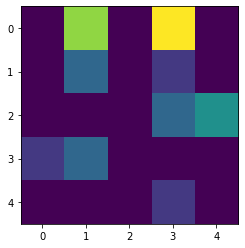

[-0.5, -0.5]


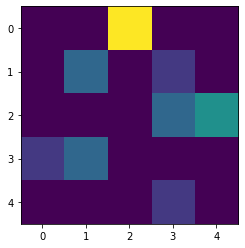

[0, 0]


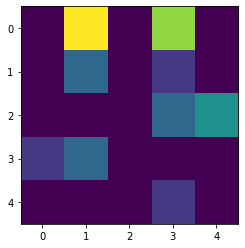

[0, 0]


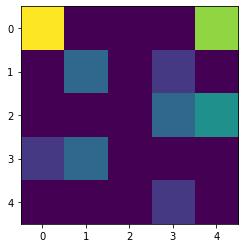

[0, 0]


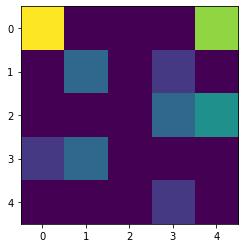

[0, 0]


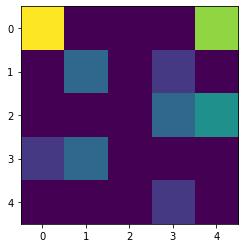

[0, 0]


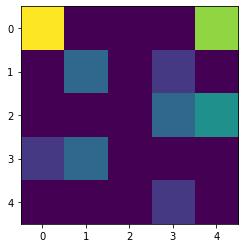

[0, 0]


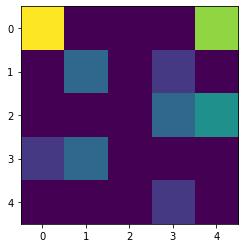

[0, 0]


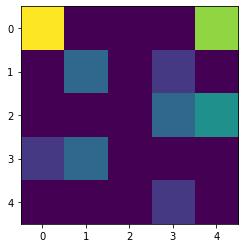

[0, 0]


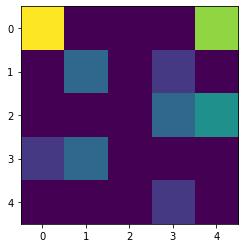

In [83]:
# Définition de la carte de l'environnement
map = [
    ["F", "F", "F", "F", "F"],
    ["F", "S", "F", "H", "F"],
    ["F", "F", "F", "S", "G"],
    ["H", "S", "F", "F", "F"],
    ["F", "F", "F", "H", "F"]
]

# Création de l'environnement
env = Environment(map, 5, 2)
# Création des agents
done1 = False
agents = [Agent(0, 0, 0,False),Agent(4, 0, 0, False)]

# Création du jeu
game = Game(env, agents)

for i in range(10):
    # Exemple d'utilisation : déplacement des agents
    actions = [2,0]  # Par exemple, déplacer l'agent vers le bas
    new_states, rewards, done = game.step(actions)
    print(rewards)
    # Affichage de l'environnement après le déplacement
    game.display()

In [4]:
import numpy as np
import random

# Define the map as a numpy array
mapp = np.array([
    "FFFFFFFFFFFFFFFFFFFF",
    "FFFFFHHFFFFFFFFFFFFF",
    "FFFFFFFFFFSHFFFFFFFF",
    "SFFFFFFFFFFHHFFFFFFF",
    "FFFFFHFFHFFFHFFFFFFS",
    "FFFFFHHHHFFFFFFFFHHF",
    "FFFFFFFFFFFHHFFFFFHF",
    "SFFFSFFFFFFHFFFFFFHF",
    "FFFHFFFFFFFHHFFFFFFF",
    "FFFFFFFFFFFHFFFFFFFF",
    "FFFSSFFFFFFHHFFFFFFS",
    "FFFFFHHFFFFFFFFFFFFS",
    "FFFFFFFFFFFHHHHFFFFF",
    "FFFFFHFFFFFFHHFFFFFF",
    "FFFFFFFFFFFHHFFFFFFF",
    "FFFFSFFFFFFHFFFFFFHF",
    "FFFFFFFFFFFHHFFFFFFF",
    "FFFFHFFFFFFHFFFFFGSF",
    "FFFFFFFFFFFFFFFFFFFS",
    "FFFFHFFFFFFHHFFFFFFF",
    "FFFFSFFFFFFHFFFFFSFF"
])

# Count the number of F's in the map
num_f = np.count_nonzero(mapp == "F")

# Ensure the number of replacements is less than or equal to the number of F's
num_replacements = min(10, num_f)  # Change 10 to your desired number of replacements

# Find all indices of F's in the map
f_indices = np.where(mapp == "F")

# Randomly select indices to replace (without replacement)
replace_indices = random.sample(list(zip(*f_indices)), num_replacements)

# Replace F's with S's at the selected indices
for row, col in replace_indices:
    mapp[row, col] = "S"

# Print the modified map
print(mapp)


['FFFFFFFFFFFFFFFFFFFF' 'FFFFFHHFFFFFFFFFFFFF' 'FFFFFFFFFFFHFFFFFFFF'
 'FFFFFFFFFFFHHFFFFFFF' 'FFFFFHFFFFFFHHFFFFFS' 'FFFFFHHHHFFFFFFHHHHF'
 'FFFFFFFFFFFHHFFFFFHF' 'FFFFFFFFFFFHFFFFFFHF' 'FFFFFFFFFFFHHFFFFFFF'
 'FFFFFFFFFFFHFFFFFFFF' 'FFFFFFFFFFFHHFFFFFFF' 'FFFFFHHFFFFFFFFFFFFF'
 'FFFFFFFFFFFHHHHFFFFF' 'FFFFFHFFFFFFHHFFFFFF' 'FFFFFFFFFFFHHFFFFFFF'
 'FFFFFFFFFFFHFFFFFFFF' 'FFFFFFFFFFFHHFFFFFFF' 'FFFFFFFFFFFHFFFFFGSF'
 'FFFFFFFFFFFFFFFFFFFS' 'FFFFFFFFFFFHHFFFFFFF' 'FFFFFFFFFFFHFFFFFFFF']


# Deplacement aleatoire

In [9]:
import numpy as np

next_state = [0,0,0,0]
state = [0,0,0,0]
reward = [0,0,0,0]
done  = ["","","",""]
# Créez une instance de l'environnement
mapp = np.array([
    "FFFFFFFFFFFFFFFFFFFF",
    "FFFFFHHFFFFFFFFFFFFF",
    "FFFFFFFFFFFHFFFFFFFF",
    "FFFFFFFFFFFHHFFFFFFF",
    "FFFFFHFFFFFFHHFFFFFS",
    "FFFFFHHHHFFFFFFHHHHF",
    "FFFFFFFFFFFHHFFFFFHF",
    "FFFFFFFFFFFHFFFFFFHF",
    "FFFFFFFFFFFHHFFFFFFF",
    "FFFFFFFFFFFHFFFFFFFF",
    "FFFFFFFFFFFHHFFFFFFF",
    "FFFFFHHFFFFFFFFFFFFF",
    "FFFFFFFFFFFHHHHFFFFF",
    "FFFFFHFFFFFFHHFFFFFF",
    "FFFFFFFFFFFHHFFFFFFF",
    "FFFFFFFFFFFHFFFFFFFF",
    "FFFFFFFFFFFHHFFFFFFF",
    "FFFFFFFFFFFHFFFFFGSF",
    "FFFFFFFFFFFFFFFFFFFS",
    "FFFFFFFFFFFHHFFFFFFF",
    "FFFFFFFFFFFHFFFFFFFF"
])
n =20
p=4

# Création de l'environnement
env = Environment(mapp, 20, 4)  # Nombre d'agents = 2

# Création des agents avec des positions initiales aléatoires
agents = [Agent(np.random.randint(env.size_map**2), np.random.randint(5), 0, False) for _ in range(env.number_agent)]
#agents = [Agent(2, np.random.randint(5), 0, False) for _ in range(env.number_agent)]

# Création du jeu
game = Game(env, agents)

# Nombre maximum d'itérations avant la fin de l'épisode
max_iterations = 100

# Boucle principale de l'épisode
for i in range(max_iterations):
    # Actions aléatoires pour chaque agent
    actions = [np.random.randint(5) for _ in range(env.number_agent)]
   
    # Exécution des actions et récupération des résultats
    new_states, rewards, done = game.step(actions)

    # Affichage des informations
    #print(f"Iteration {i + 1}:")
    #print(f"Action {actions}")
    #print("New States:", new_states)
    #print("Rewards:", rewards)
    #print("Done:", done)
    #game.display()
    game.save_history()
    
    
    # Vérification si l'épisode est terminé

print(game.history)
game.render()


[[[129, 2], [241, 1], [66, 2], [312, 1]], [[149, 1], [240, 0], [86, 1], [332, 1]], [[149, 4], [260, 1], [106, 1], [312, 3]], [[150, 2], [260, 4], [105, 0], [312, 4]], [[149, 0], [261, 2], [125, 1], [312, 4]], [[169, 1], [260, 0], [105, 3], [313, 2]], [[168, 0], [260, 0], [105, 4], [312, 0]], [[169, 2], [261, 2], [85, 3], [292, 3]], [[169, 4], [262, 2], [105, 1], [292, 4]], [[189, 1], [242, 3], [105, 4], [291, 0]], [[190, 2], [242, 4], [104, 0], [291, 4]], [[191, 2], [262, 1], [105, 2], [311, 1]], [[211, 1], [282, 1], [104, 0], [312, 2]], [[231, 1], [283, 2], [104, 4], [311, 0]], [[211, 3], [284, 2], [105, 2], [312, 2]], [[212, 2], [304, 1], [105, 4], [311, 0]], [[211, 0], [304, 4], [105, 4], [311, 4]], [[212, 2], [304, 4], [105, 4], [312, 2]], [[192, 3], [305, 2], [105, 4], [292, 3]], [[172, 3], [306, 2], [106, 2], [272, 3]], [[192, 1], [305, 0], [86, 3], [271, 0]], [[193, 2], [325, 1], [87, 2], [272, 2]], [[192, 0], [345, 1], [86, 0], [252, 3]], [[212, 1], [365, 1], [86, 4], [272, 1]]

IndexError: string index out of range

# Qlearning 4x4

nombre de step : 1
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


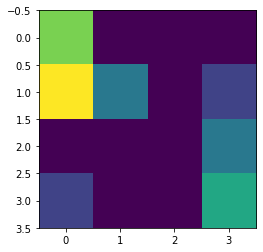

nombre de step : 2
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


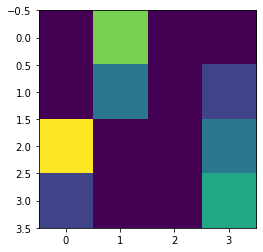

nombre de step : 3
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


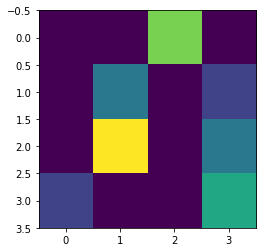

nombre de step : 4
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


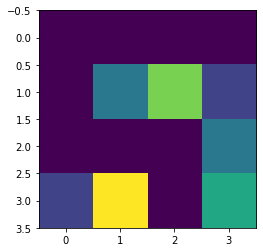

nombre de step : 5
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


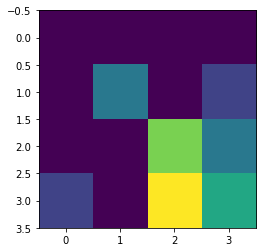

nombre de step : 6
rewards : [0, 1]
done : [False, True]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


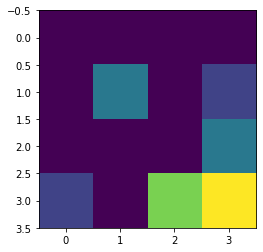

nombre de step : 7
rewards : [1, 1]
done : [True, True]
terminated : True
game_over : True
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


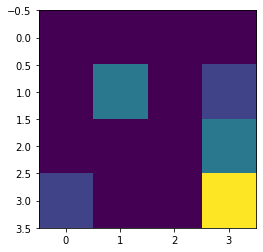

nombre de step : 1
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


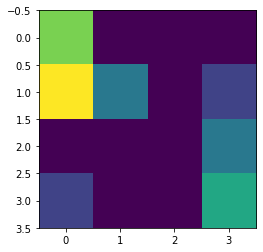

nombre de step : 2
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


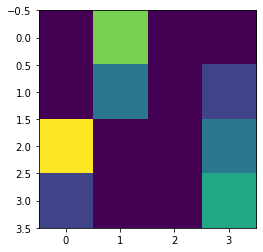

nombre de step : 3
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


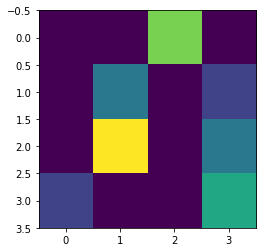

nombre de step : 4
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


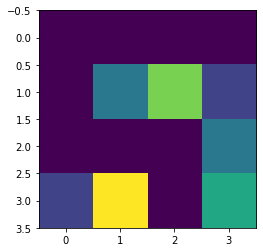

nombre de step : 5
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


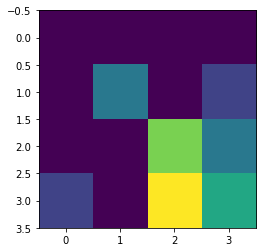

nombre de step : 6
rewards : [0, 1]
done : [False, True]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


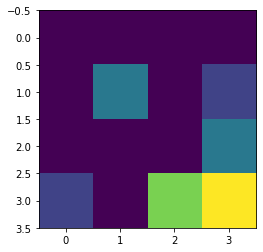

nombre de step : 7
rewards : [1, 1]
done : [True, True]
terminated : True
game_over : True
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


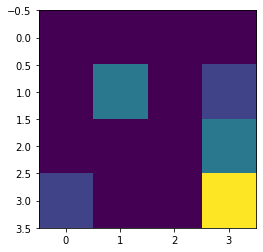

nombre de step : 1
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


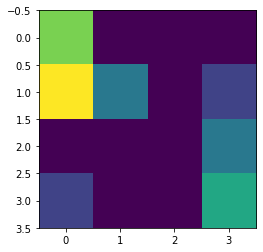

nombre de step : 2
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


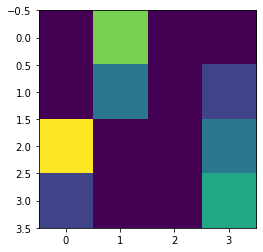

nombre de step : 3
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


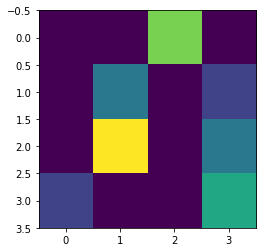

nombre de step : 4
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


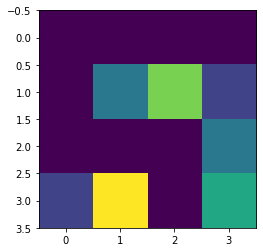

nombre de step : 5
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


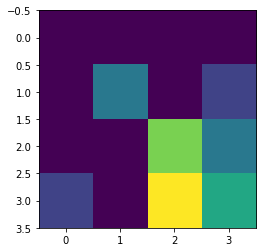

nombre de step : 6
rewards : [0, 1]
done : [False, True]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


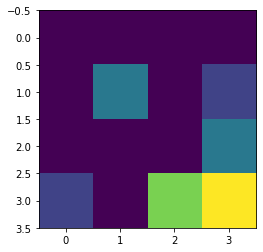

nombre de step : 7
rewards : [1, 1]
done : [True, True]
terminated : True
game_over : True
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


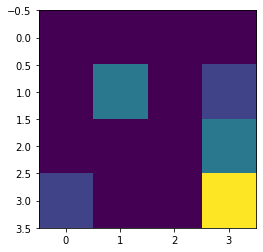

nombre de step : 1
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


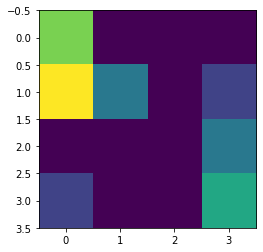

nombre de step : 2
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


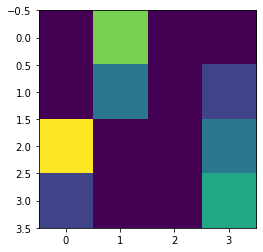

nombre de step : 3
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


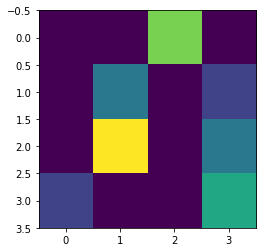

nombre de step : 4
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


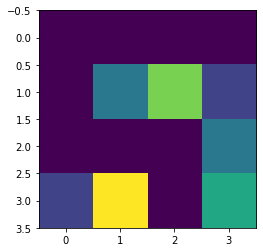

nombre de step : 5
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


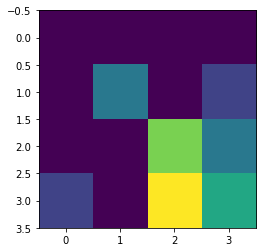

nombre de step : 6
rewards : [0, 1]
done : [False, True]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


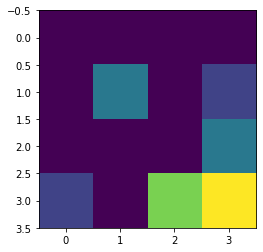

nombre de step : 7
rewards : [1, 1]
done : [True, True]
terminated : True
game_over : True
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


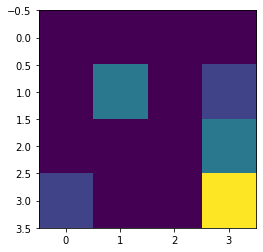

nombre de step : 1
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


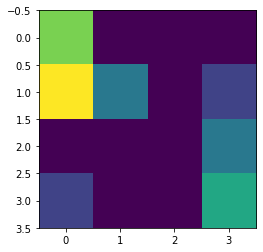

nombre de step : 2
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


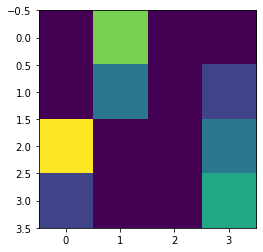

nombre de step : 3
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


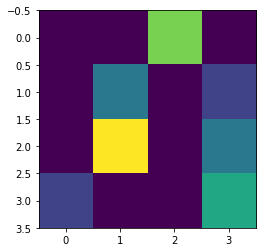

nombre de step : 4
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


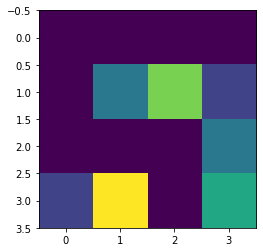

nombre de step : 5
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


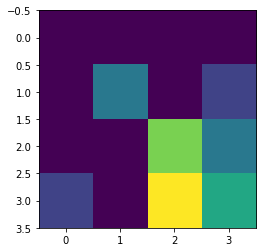

nombre de step : 6
rewards : [0, 1]
done : [False, True]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


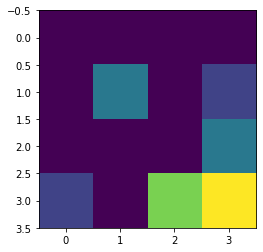

nombre de step : 7
rewards : [1, 1]
done : [True, True]
terminated : True
game_over : True
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


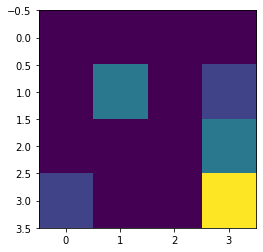

nombre de step : 1
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


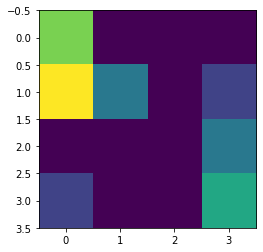

nombre de step : 2
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


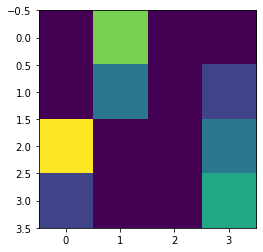

nombre de step : 3
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


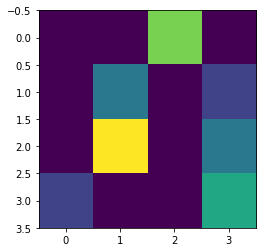

nombre de step : 4
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


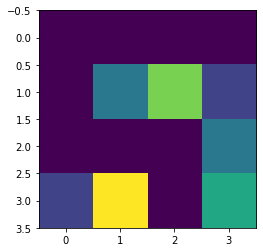

nombre de step : 5
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


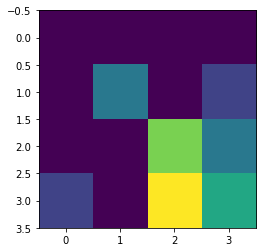

nombre de step : 6
rewards : [0, 1]
done : [False, True]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


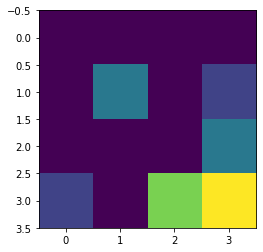

nombre de step : 7
rewards : [1, 1]
done : [True, True]
terminated : True
game_over : True
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


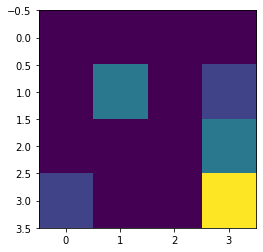

nombre de step : 1
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


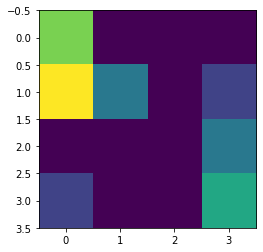

nombre de step : 2
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


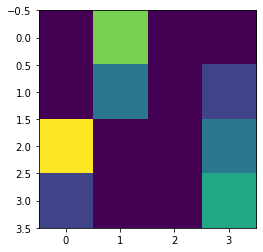

nombre de step : 3
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


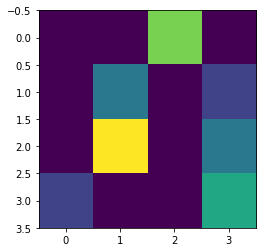

nombre de step : 4
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


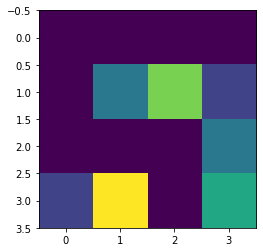

nombre de step : 5
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


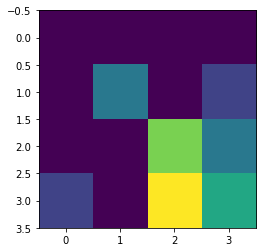

nombre de step : 6
rewards : [0, 1]
done : [False, True]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


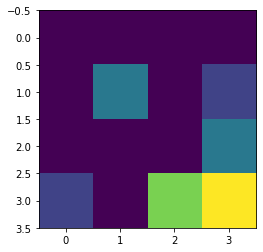

nombre de step : 7
rewards : [1, 1]
done : [True, True]
terminated : True
game_over : True
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


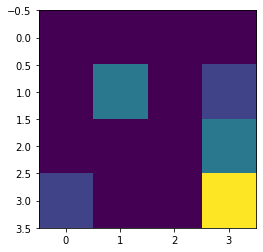

nombre de step : 1
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


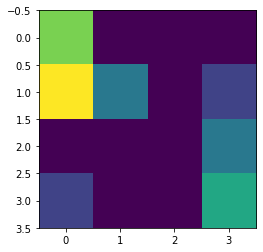

nombre de step : 2
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


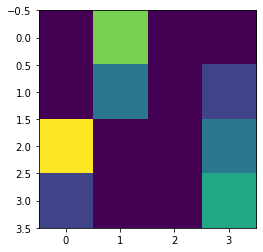

nombre de step : 3
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


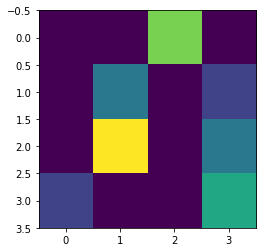

nombre de step : 4
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


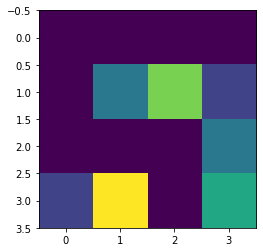

nombre de step : 5
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


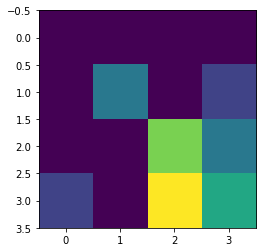

nombre de step : 6
rewards : [0, 1]
done : [False, True]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


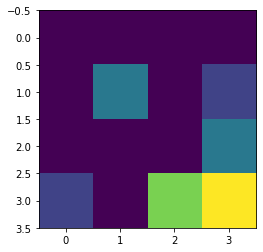

nombre de step : 7
rewards : [1, 1]
done : [True, True]
terminated : True
game_over : True
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


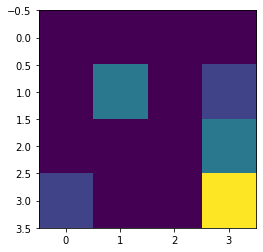

nombre de step : 1
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


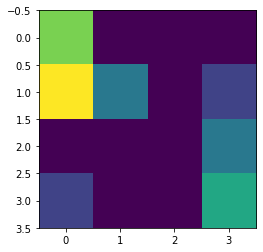

nombre de step : 2
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


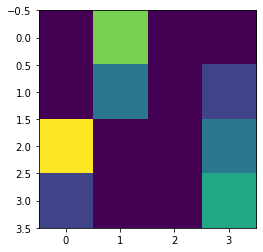

nombre de step : 3
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


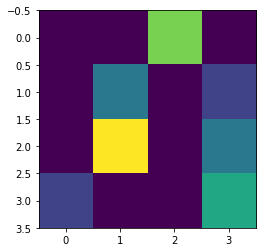

nombre de step : 4
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


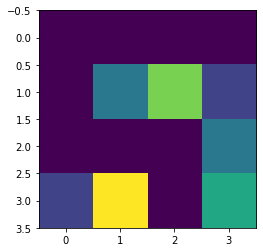

nombre de step : 5
rewards : [0, 0]
done : [False, False]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


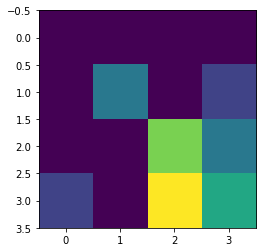

nombre de step : 6
rewards : [0, 1]
done : [False, True]
terminated : False
game_over : False
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


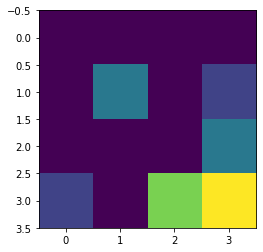

nombre de step : 7
rewards : [1, 1]
done : [True, True]
terminated : True
game_over : True
16
position ag1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


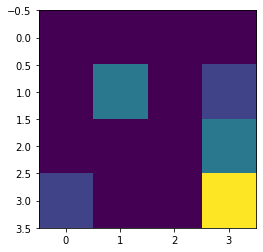

In [6]:
import numpy as np
import random

mapp = np.array([
            ["F", "F", "F", "F"],
            ["F", "S", "F", "H"],
            ["F", "F", "F", "S"],
            ["H", "F", "F", "G"],
        ])

# Create an environment with the map and two agents
env = Environment(mapp, 4, 2)

# Création des agents avec des positions initiales aléatoires
#agents = [Agent(np.random.randint(env.size_map**2), np.random.randint(5), 0) for _ in range(env.number_agent)]
agents = [Agent(0,0,0, False), Agent(4,0,0, False)]

# Création du jeu
game = Game(env, agents)

gamma = 0.9
alpha = 0.1

Q1 = np.zeros([env.size_map ** 2, 5])
Q2 = np.zeros([env.size_map ** 2, 5])
action = [0, 0]
nbEpisodes = 20000

epsilon = 1  # 1 = 100% random actions
epsilon_decay_rate = 1 / nbEpisodes       # epsilon decay rate. 1 / 0.0001 = 10,000
rng = np.random.default_rng()
  
for i in range(nbEpisodes):
    
    done = [False, False]
    terminated =  False
    nbSteps = 0
    
    for j in range(2):
        game.reset(game.agents[j])
        #game.agents[j].state = np.random.randint(env.size_map**2)

    while (nbSteps<= 30 and (not terminated)):
 
        state1 = game.agents[0].state
        state2 = game.agents[1].state

        if not(game.agents[0].done): # look if agent1 is in a hole or got the reward
            # Epsilon Greedy for agent1
            if rng.random() < epsilon:
                action1 = np.random.choice([0, 1, 2, 3, 4])
            else:
                action1 = np.argmax(Q1[state1, :])
        else:
             action1 = 4 # rester sur place  
                
        action[0] = action1
        
        if not(game.agents[1].done): # look if agent1 is in a hole or got the reward
            # Epsilon Greedy for agent2
            if rng.random() < epsilon:
                action2 = np.random.choice([0, 1, 2, 3, 4])

            else:
                action2 = np.argmax(Q2[state2, :])
        else:
             action2 = 4 # rester sur place
                
        action[1] = action2
        
        previous_done = done 
        
        next_states, rewards, done = game.step(action)

        if not previous_done[0]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q1[state1, action1] = Q1[state1, action1] + alpha * (
                game.agents[0].reward + gamma * np.max(Q1[game.agents[0].state, :]) - Q1[state1, action1])

        if state1 == state2 and action1 == action2:
            game.agents[1].reward = game.agents[1].reward - 0.01
        else:
            game.agents[1].reward = game.agents[1].reward
            
        if not previous_done[1]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q2[state2, action2] = Q2[state2, action2] + alpha * (
                        game.agents[1].reward + gamma * np.max(Q2[game.agents[1].state, :]) - Q2[state2, action2])

        nbSteps += 1
        
        if epsilon == 0:
            alpha = 0.01
        terminated = game.game_over()    
        #if done[0]== True and done[1]== True:
           # terminated = True
            #print("episode terminé")
            
        if i > nbEpisodes - 10:
            print(f"nombre de step : {nbSteps}")
            print(f"rewards : {rewards}")
            print(f"done : {done}")
            print(f"terminated : {terminated}")
            print(f"game_over : {game.game_over()}")
            print("position ag1", env.position(game.agents[0].state))

            game.display()
              
    epsilon = max(epsilon - epsilon_decay_rate, 0)

      

In [148]:
Q2

array([[ 5.18769031,  5.71219043,  5.66870981,  5.1732826 ,  5.11883923],
       [ 5.1806202 ,  0.77585329,  6.28015059,  5.7267416 ,  5.67545855],
       [ 5.71890038,  6.98617788,  5.75247164,  6.40706872,  6.28616658],
       [ 6.31820696,  6.23025499,  5.76186388,  5.73481098,  5.72495652],
       [ 5.75500322,  6.3806212 ,  0.77688547,  5.19747956,  5.76074777],
       [ 0.94550673,  0.42443335,  1.30794963,  0.94942502,  0.77449027],
       [ 0.77482437,  7.87222025,  6.20574993,  6.35604714,  7.0895223 ],
       [ 7.09520861,  1.91011668,  6.21004094,  5.76089624,  6.15470079],
       [ 6.41302027,  6.9941975 ,  7.1335448 ,  5.77953244,  6.39089939],
       [ 6.43605217,  7.98087295,  7.87793249,  0.7628624 ,  7.14124957],
       [ 7.17651628,  8.84673002,  1.93149589,  7.16391249,  7.92205917],
       [ 2.59190869,  1.55734321, -0.031     ,  1.06616796,  1.93230823],
       [ 6.98240294,  6.98412112,  7.92050388,  6.38281148,  6.93878562],
       [ 6.97653596,  8.01694501,  8.8

# Tester le Q_learning 4x4

In [13]:
mapp = np.array([
            ["F", "F", "F", "F"],
            ["F", "S", "F", "H"],
            ["F", "F", "F", "S"],
            ["H", "F", "F", "G"],
        ])

# Create an environment with the map and two agents
env = Environment(mapp, 4, 2)

# Création des agents avec des positions initiales aléatoires
#agents = [Agent(np.random.randint(env.size_map**2), np.random.randint(5), 0) for _ in range(env.number_agent)]
agents = [Agent(0,0,0,False), Agent(1,0,0,False)]

# Création du jeu
game1 = Game(env, agents)


for i in range(10):
    print(f"episode {i + 1}")
    
    terminated = False
    nbSteps = 0
    for j in range(2):
        game1.reset(game1.agents[j])
    game1.reset_history()
    
    while (nbSteps< 10 and not terminated):
        
        state1 = game1.agents[0].state
        state2 = game1.agents[1].state
        
        # Epsilon Greedy pour l'agent 1 (exploitation uniquement)
        if not(game1.agents[0].done):
            action1 = np.argmax(Q1[state1, :])
        else:
             action1 = 4

        # Epsilon Greedy pour l'agent 2 (exploitation uniquement)
        if not(game1.agents[1].done):
            action2 = np.argmax(Q2[state2, :])
        else:
             action2 = 4

        action = [action1, action2]
        
        # Effectuer l'étape avec les actions choisies
        next_states, rewards, done = game1.step(action)
        nbSteps += 1
       
        terminated = game1.game_over()
        #print(f"rewards = {game1.agents[0].reward}, {game1.agents[1].reward}")
        #print(f"done agent = {game1.agents[0].done}, {game1.agents[1].done}")
        #print(f"done  = {done}")
        #game1.agents[0].state = next_states[0]
        #game1.agents[0].action = action[0]
        
        #game1.display()
        game1.save_history()

print(game1.history)
game1.render()
        


episode 1
episode 2
episode 3
episode 4
episode 5
episode 6
episode 7
episode 8
episode 9
episode 10
[[[0, 4], [1, 4]], [[1, 2], [0, 0]], [[2, 2], [4, 1]], [[6, 1], [8, 1]], [[10, 1], [9, 2]], [[14, 1], [13, 1]], [[15, 2], [14, 2]], [[15, 4], [15, 2]]]
Game quit


In [112]:
Q2

array([[ 0.36594813,  0.56977498,  0.31006402,  0.44121618,  0.45324369],
       [ 0.46924862, -0.41906629,  0.42939056,  0.36183526,  0.41665119],
       [ 0.38573604,  0.57411603,  0.46513857,  0.43754428,  0.52184008],
       [ 0.5066614 ,  0.37822015,  0.46931911,  0.45970802,  0.45601172],
       [ 0.56268256,  0.65608815, -0.40000001,  0.46484626,  0.59046773],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.437267  ,  0.62752026,  0.34145338,  0.52741732,  0.58156288],
       [ 0.62242581, -0.40184952,  0.35912785,  0.51561041,  0.35584013],
       [ 0.63285706,  0.49877235,  0.72899501,  0.57261367,  0.56324678],
       [ 0.61794702,  0.80999844,  0.73083457, -0.40003226,  0.66897567],
       [ 0.68684912,  0.8292017 , -0.40963264,  0.4701712 ,  0.57371995],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.48624993,  0.48990843,  0.78990231,  0.61060209,  0.4882559 ],
       [ 0.49705265,  0.74775977,  0.8

# Qlearning 8x8 avec deux agent intialisé a des position differentes

In [177]:
import numpy as np
import random

mapp = np.array([
    "FFFFFFFF",
    "FFFFHFFF",
    "SFFHFFFS",
    "FFFFFHFF",
    "FFFHFFFF",
    "FHSFFFHF",
    "FHGFHFHF",
    "FFFHFFFF",
])
# Create an environment with the map and two agents
env = Environment(mapp, 8, 2)

# Création des agents avec des positions initiales aléatoires
#agents = [Agent(np.random.randint(env.size_map**2), np.random.randint(5), 0) for _ in range(env.number_agent)]
agents = [Agent(4,0,0, False), Agent(5,0,0, False)]

# Création du jeu
game = Game(env, agents)

gamma = 0.9
alpha = 0.1

Q1 = np.zeros([env.size_map ** 2, 5])
Q2 = np.zeros([env.size_map ** 2, 5])
action = [0, 0]
nbEpisodes = 50000

epsilon = 1  # 1 = 100% random actions
epsilon_decay_rate = 1 / nbEpisodes       # epsilon decay rate. 1 / 0.0001 = 10,000
rng = np.random.default_rng()
  
for i in range(nbEpisodes):
    
    done = [False, False]
    terminated =  False
    nbSteps = 0
    agent1_etat_action = []
    for j in range(2):
        game.reset(game.agents[j])
        
    while (nbSteps<= 60 and (not terminated)):
 
        state1 = game.agents[0].state
        state2 = game.agents[1].state

        if not(game.agents[0].done): # look if agent1 is in a hole or on the reward state
            # Epsilon Greedy for agent1
            if rng.random() < epsilon:
                action1 = np.random.choice([0, 1, 2, 3, 4])
            else:
                action1 = np.argmax(Q1[state1, :])
        else:
             action1 = 4 # rester sur place  
                
        action[0] = action1
        
            #Stocker le couple (etat,action) du premier agent
        #if game.agents[0].etat_action() not in agent1_etat_action:
           # agent1_etat_action.append(game.agents[0].etat_action())

        if not(game.agents[1].done): # look if agent1 is in a hole or on the reward state
            # Epsilon Greedy for agent2
            if rng.random() < epsilon:
                action2 = np.random.choice([0, 1, 2, 3, 4])

            else:
                action2 = np.argmax(Q2[state2, :])
        else:
             action2 = 4 # rester sur place
                
        action[1] = action2
        
        previous_done = done 
        
        next_states, rewards, done = game.step(action)

        if not previous_done[0]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q1[state1, action1] = Q1[state1, action1] + alpha * (
                game.agents[0].reward + gamma * np.max(Q1[game.agents[0].state, :]) - Q1[state1, action1])

        if game.agents[1].etat_action() in agent1_etat_action:
        #print(f" VOir dans le if: {game.agents[1].etat_action()}")
            game.agents[1].reward = game.agents[1].reward - 0.1
        
        else:
            game.agents[1].reward = game.agents[1].reward
        
        if not previous_done[1]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q2[state2, action2] = Q2[state2, action2] + alpha * (
                        game.agents[1].reward + gamma * np.max(Q2[game.agents[1].state, :]) - Q2[state2, action2])

        nbSteps += 1
        
        if epsilon == 0:
            alpha = 0.01
        terminated = game.game_over()    
         
    epsilon = max(epsilon - epsilon_decay_rate, 0)

      

# Test du Qlearning 8x8 avec 2 agents

episode 1


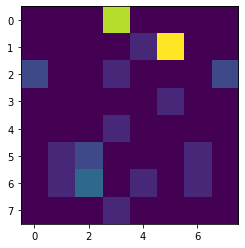

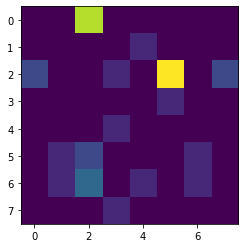

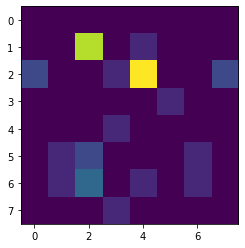

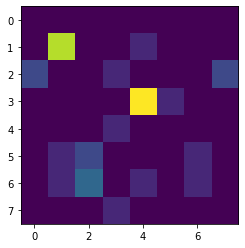

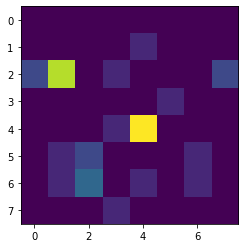

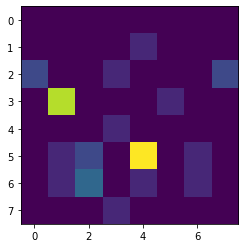

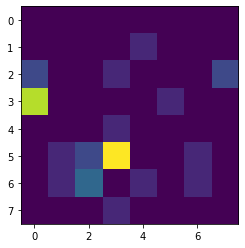

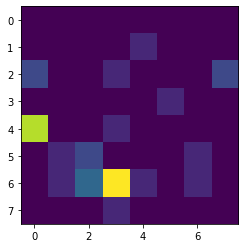

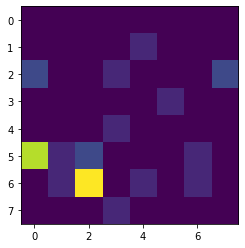

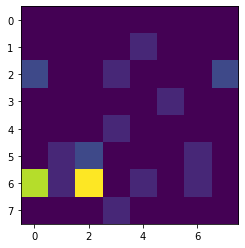

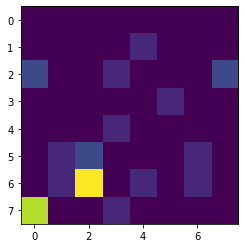

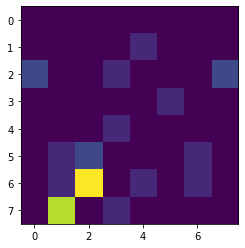

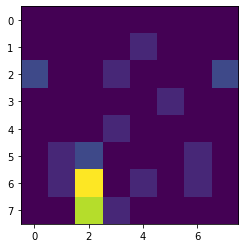

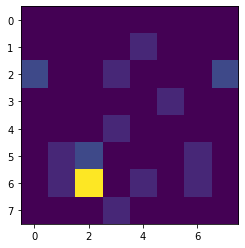

episode 2


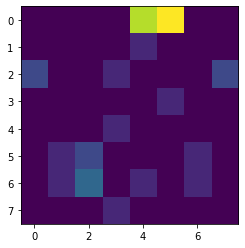

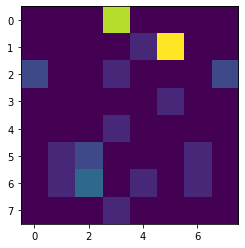

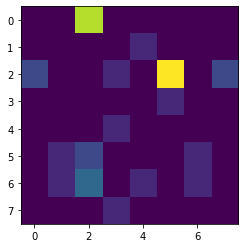

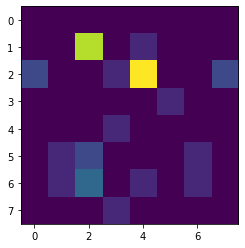

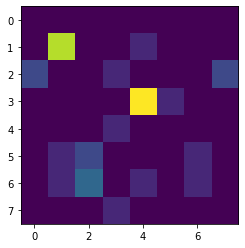

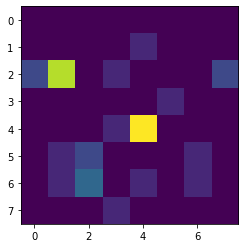

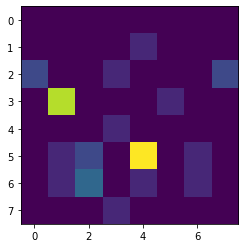

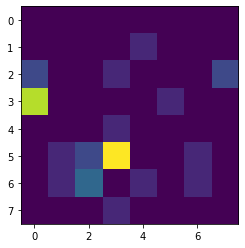

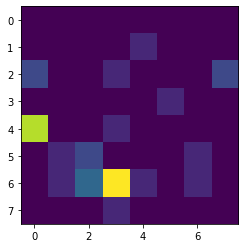

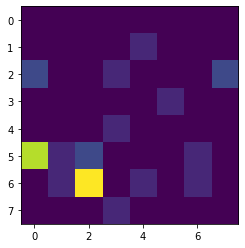

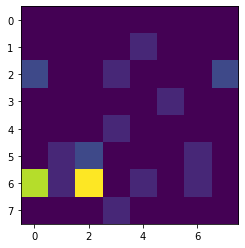

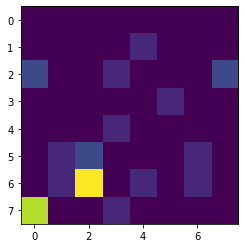

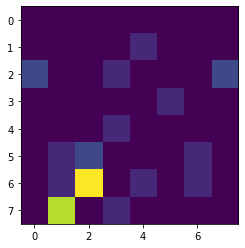

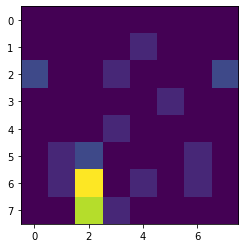

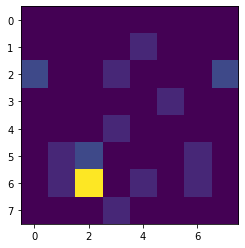

episode 3


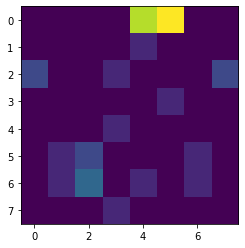

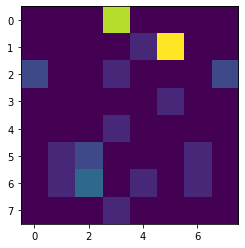

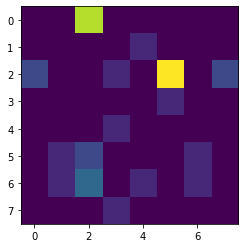

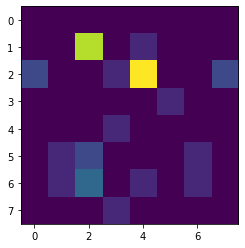

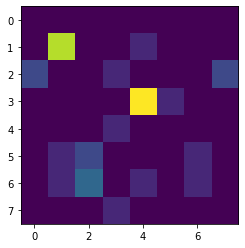

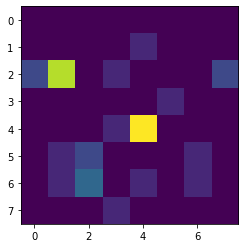

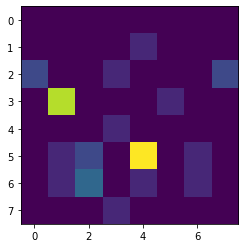

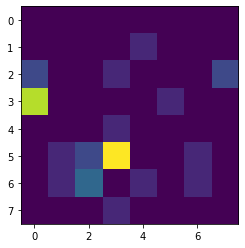

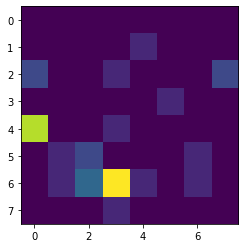

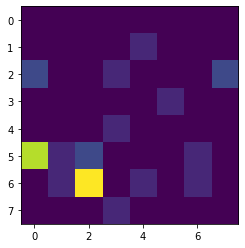

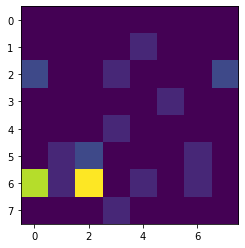

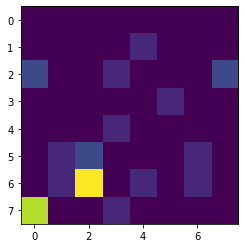

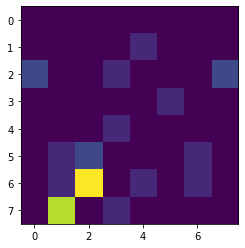

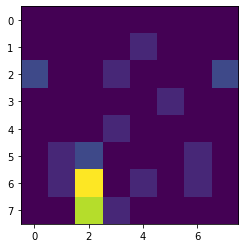

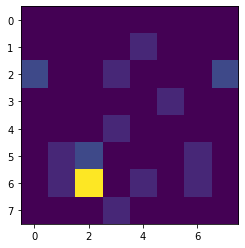

episode 4


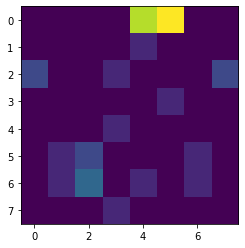

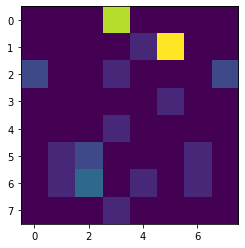

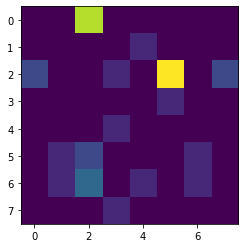

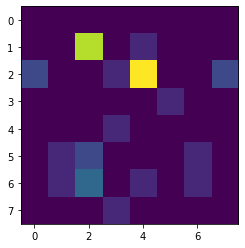

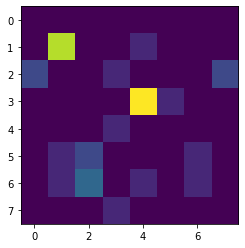

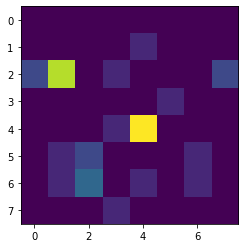

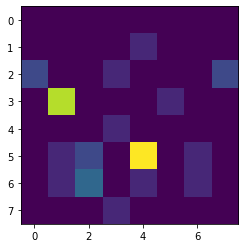

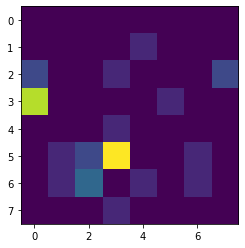

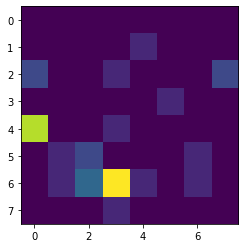

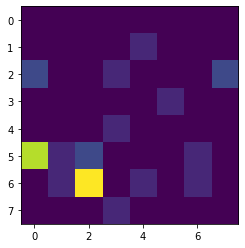

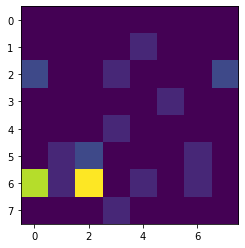

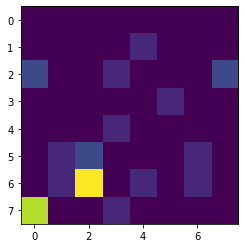

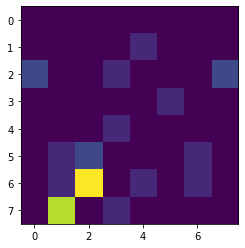

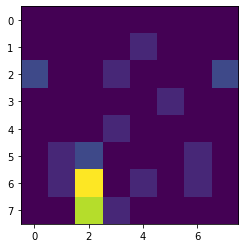

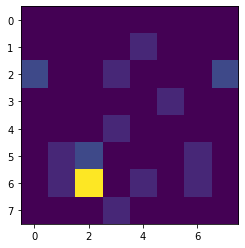

episode 5


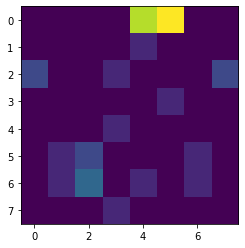

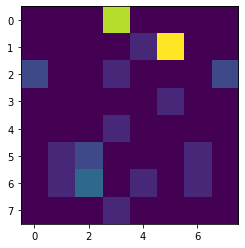

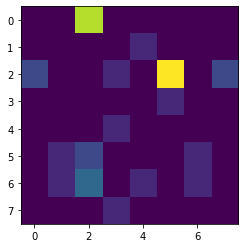

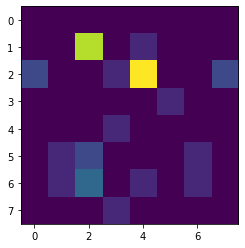

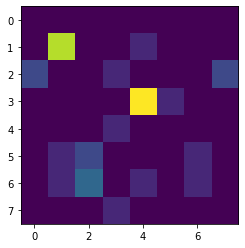

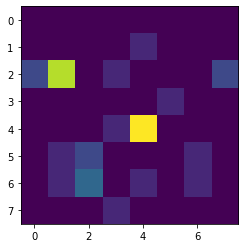

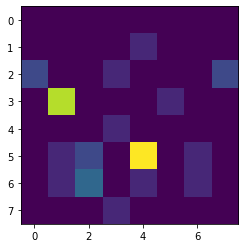

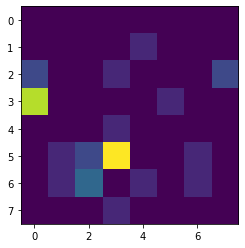

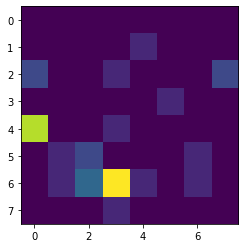

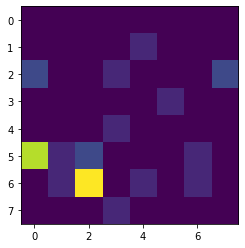

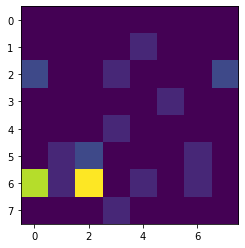

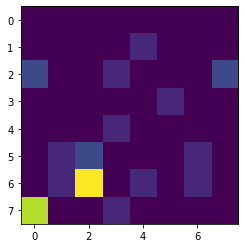

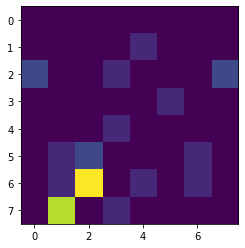

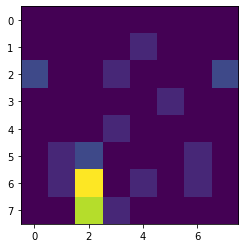

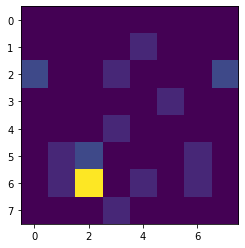

episode 6


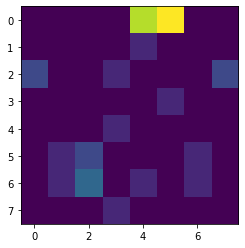

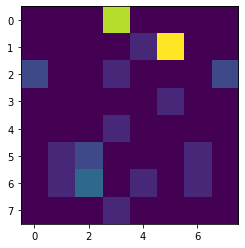

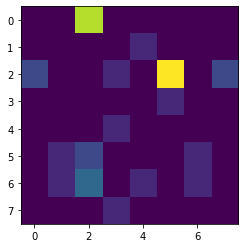

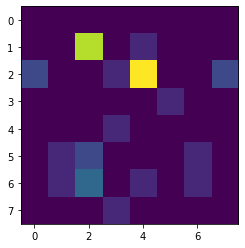

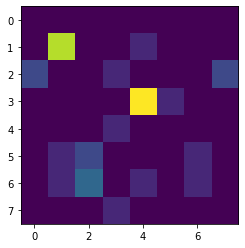

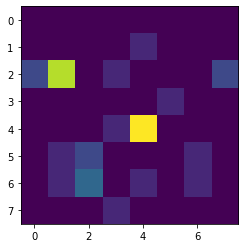

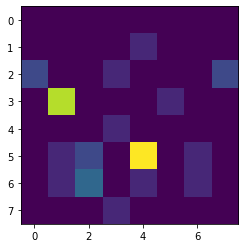

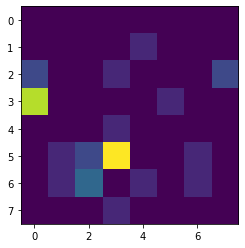

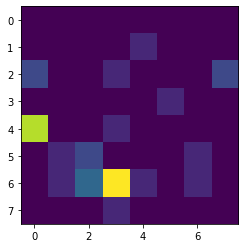

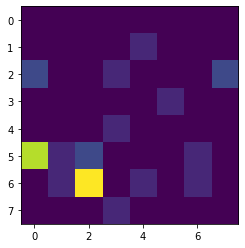

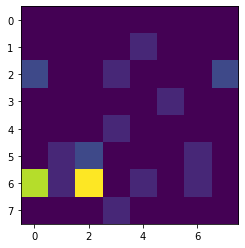

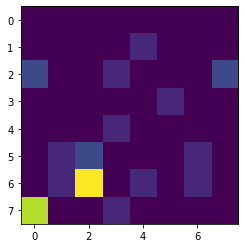

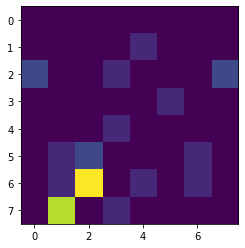

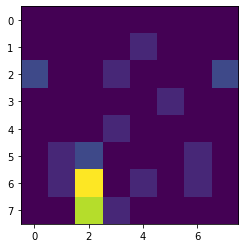

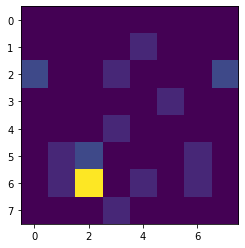

episode 7


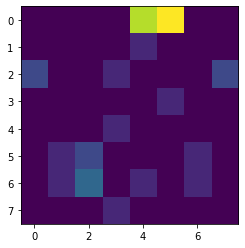

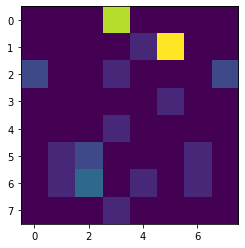

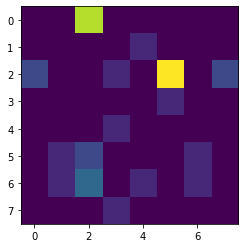

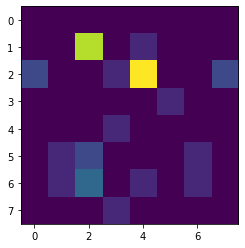

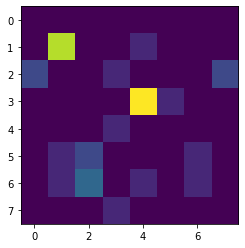

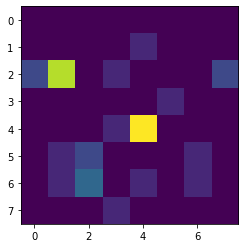

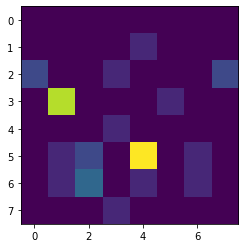

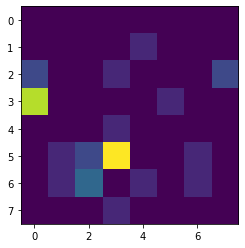

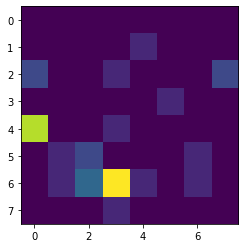

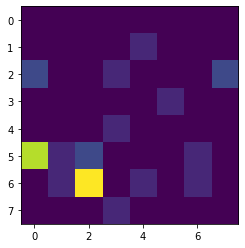

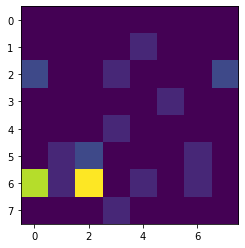

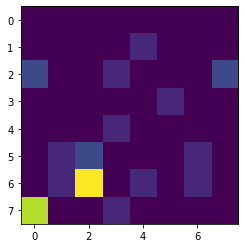

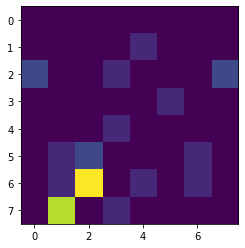

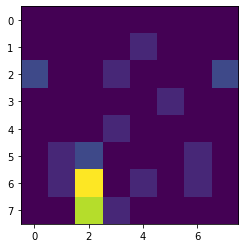

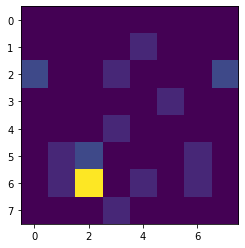

episode 8


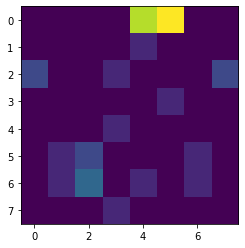

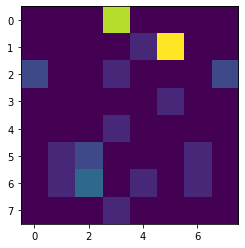

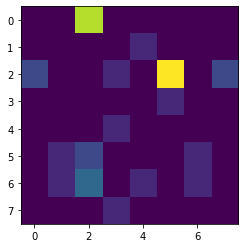

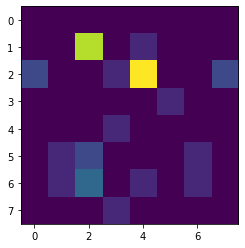

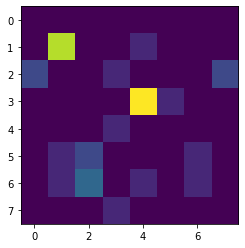

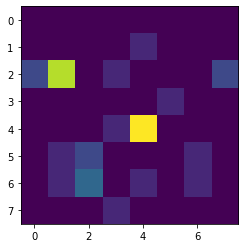

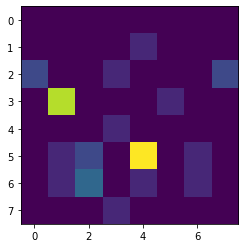

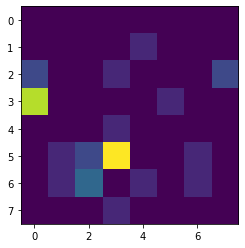

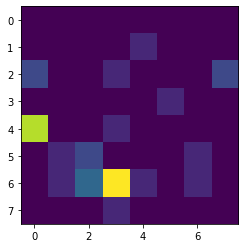

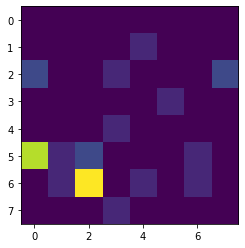

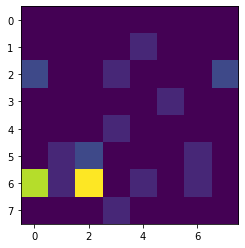

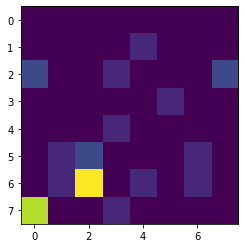

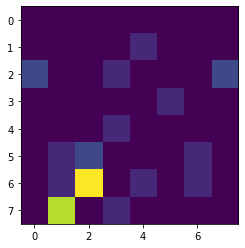

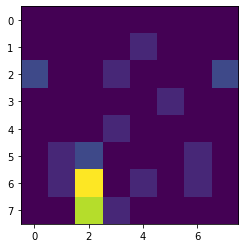

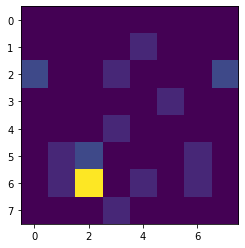

episode 9


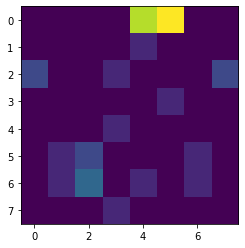

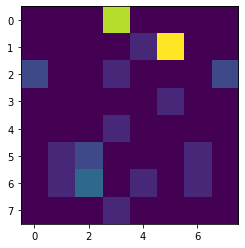

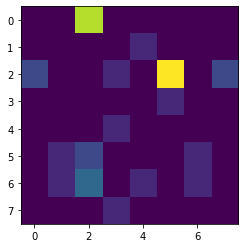

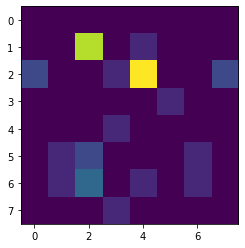

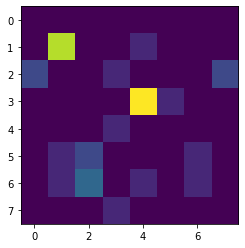

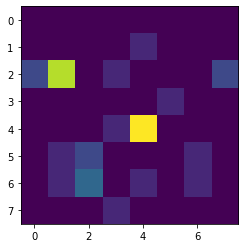

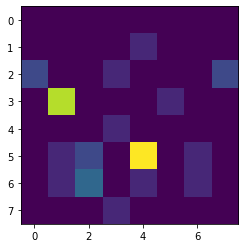

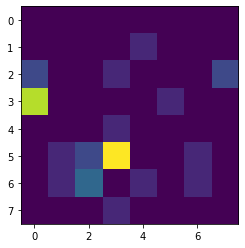

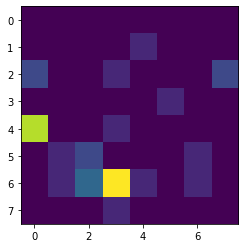

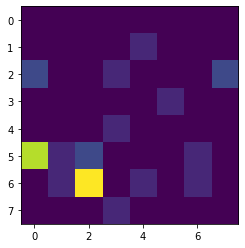

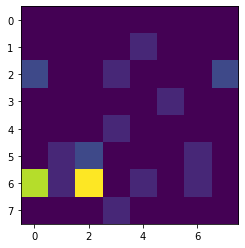

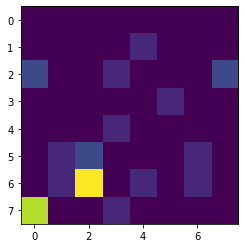

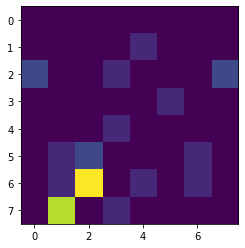

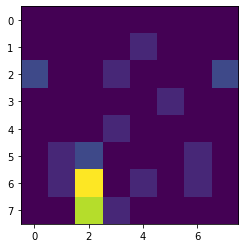

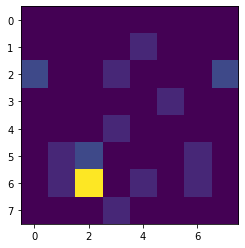

episode 10


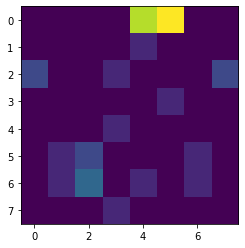

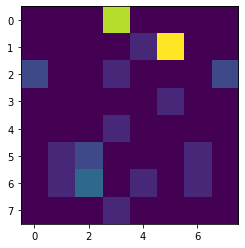

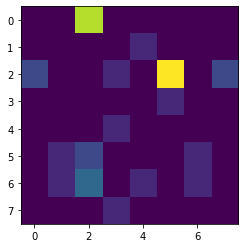

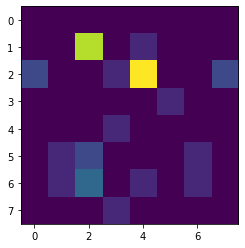

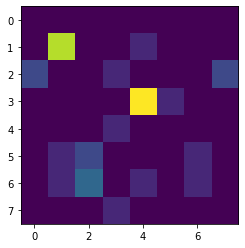

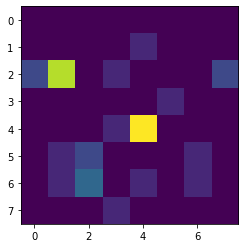

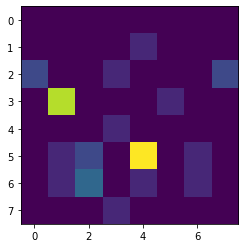

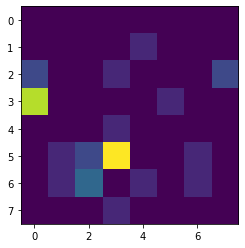

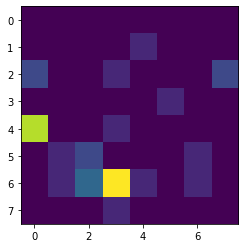

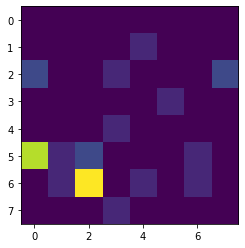

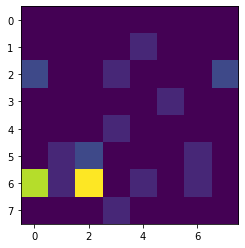

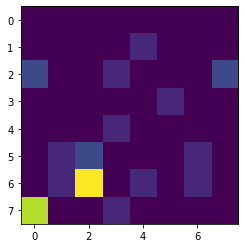

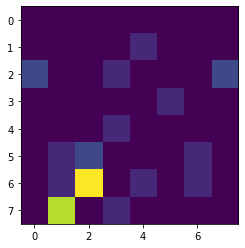

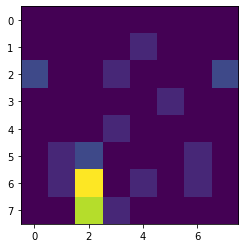

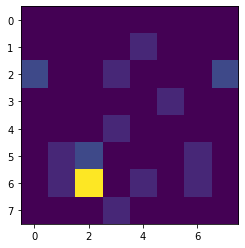

In [178]:
mapp = np.array([
    "FFFFFFFF",
    "FFFFHFFF",
    "SFFHFFFS",
    "FFFFFHFF",
    "FFFHFFFF",
    "FHSFFFHF",
    "FHGFHFHF",
    "FFFHFFFF",
])
# Create an environment with the map and two agents
env = Environment(mapp, 8, 2)

# Création des agents avec des positions initiales aléatoires
#agents = [Agent(np.random.randint(env.size_map**2), np.random.randint(5), 0) for _ in range(env.number_agent)]
agents = [Agent(4,0,0,False), Agent(5,0,0,False)]

# Création du jeu
game2 = Game(env, agents)


for i in range(10):
    print(f"episode {i + 1}")
    
    terminated = False
    nbSteps = 0
    for j in range(2):
        game2.reset(game2.agents[j])
        #print( game2.agents[0].done, game2.agents[0].done)
    while (nbSteps< 20 and not terminated):
        
        state1 = game2.agents[0].state
        state2 = game2.agents[1].state
        
        # Epsilon Greedy pour l'agent 1 (exploitation uniquement)
        if not(game2.agents[0].done):
            action1 = np.argmax(Q1[state1, :])
        else:
             action1 = 4

        # Epsilon Greedy pour l'agent 2 (exploitation uniquement)
        if not(game2.agents[1].done):
            action2 = np.argmax(Q2[state2, :])
        else:
             action2 = 4

        action = [action1, action2]
        
        # Effectuer l'étape avec les actions choisies
        next_states, rewards, done = game2.step(action)
        nbSteps += 1
       
        terminated = game2.game_over()
        
        game2.display()

        

# Qlearning 8x8 avec 3 agents

episode 100000
nombre de step : 1
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


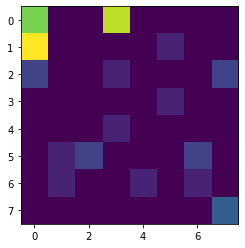

episode 100000
nombre de step : 2
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


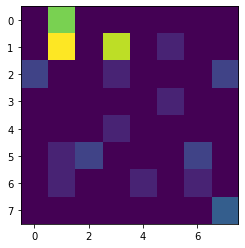

episode 100000
nombre de step : 3
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


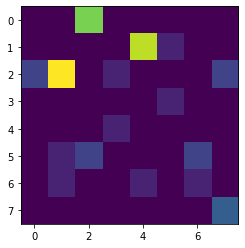

episode 100000
nombre de step : 4
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


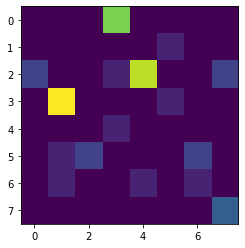

episode 100000
nombre de step : 5
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


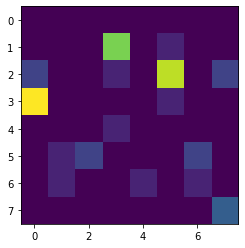

episode 100000
nombre de step : 6
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


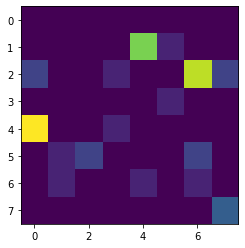

episode 100000
nombre de step : 7
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


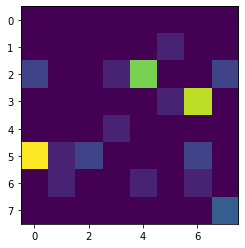

episode 100000
nombre de step : 8
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


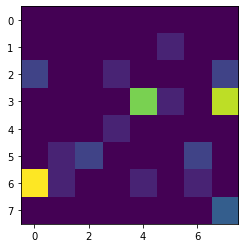

episode 100000
nombre de step : 9
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


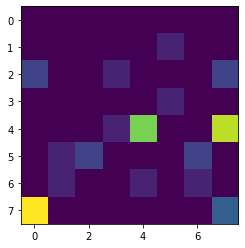

episode 100000
nombre de step : 10
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


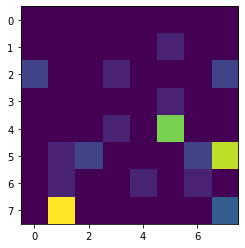

episode 100000
nombre de step : 11
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


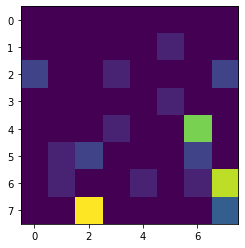

episode 100000
nombre de step : 12
rewards : [0, 1, 0]
previous done : [False, False, False]
done : [False, True, False]
terminated : False
game_over : False


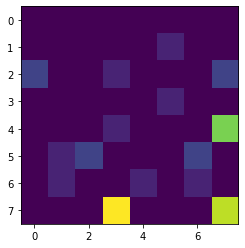

episode 100000
nombre de step : 13
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


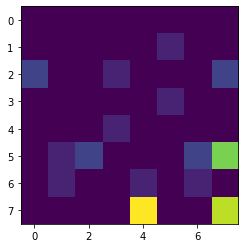

episode 100000
nombre de step : 14
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


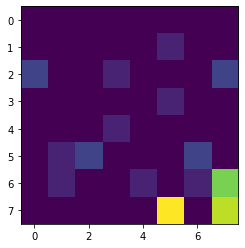

episode 100000
nombre de step : 15
rewards : [1, 1, 0]
previous done : [False, True, False]
done : [True, True, False]
terminated : False
game_over : False


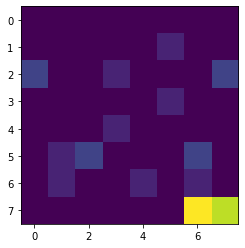

episode 100000
nombre de step : 16
rewards : [1, 1, 1]
previous done : [True, True, False]
done : [True, True, True]
terminated : True
game_over : True


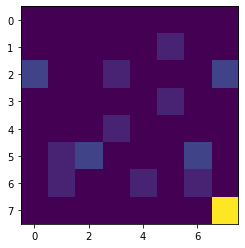

episode 100000
nombre de step : 1
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


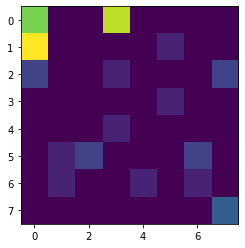

episode 100000
nombre de step : 2
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


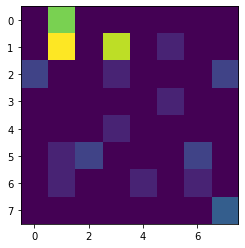

episode 100000
nombre de step : 3
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


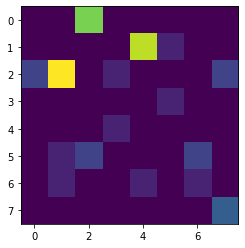

episode 100000
nombre de step : 4
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


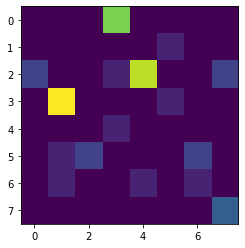

episode 100000
nombre de step : 5
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


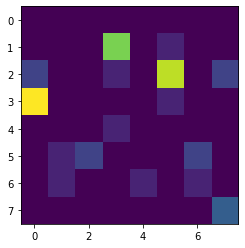

episode 100000
nombre de step : 6
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


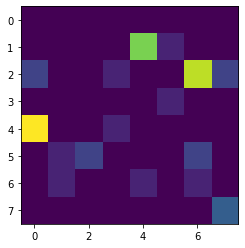

episode 100000
nombre de step : 7
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


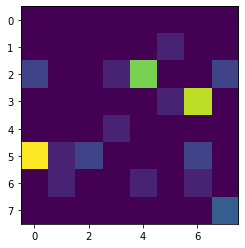

episode 100000
nombre de step : 8
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


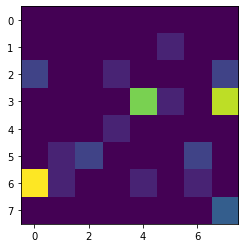

episode 100000
nombre de step : 9
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


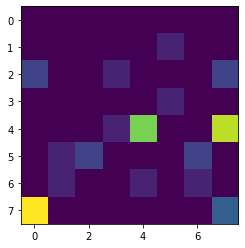

episode 100000
nombre de step : 10
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


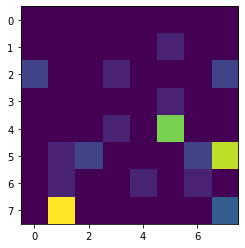

episode 100000
nombre de step : 11
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


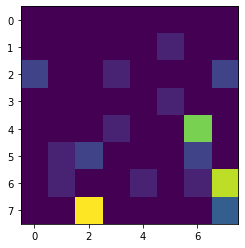

episode 100000
nombre de step : 12
rewards : [0, 1, 0]
previous done : [False, False, False]
done : [False, True, False]
terminated : False
game_over : False


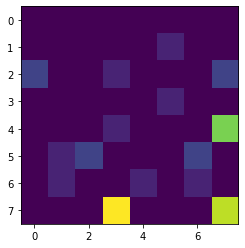

episode 100000
nombre de step : 13
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


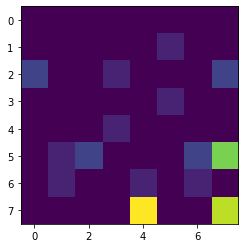

episode 100000
nombre de step : 14
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


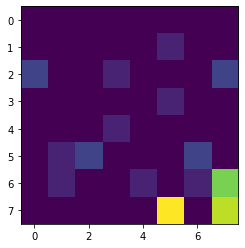

episode 100000
nombre de step : 15
rewards : [1, 1, 0]
previous done : [False, True, False]
done : [True, True, False]
terminated : False
game_over : False


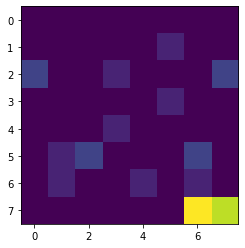

episode 100000
nombre de step : 16
rewards : [1, 1, 1]
previous done : [True, True, False]
done : [True, True, True]
terminated : True
game_over : True


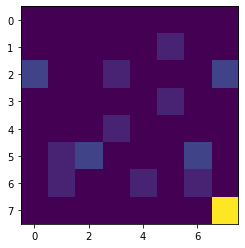

episode 100000
nombre de step : 1
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


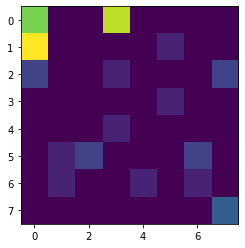

episode 100000
nombre de step : 2
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


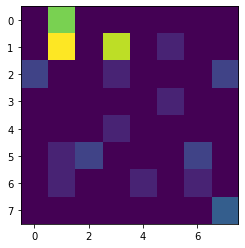

episode 100000
nombre de step : 3
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


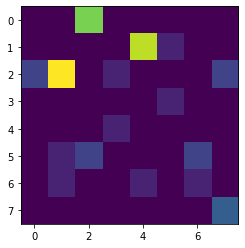

episode 100000
nombre de step : 4
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


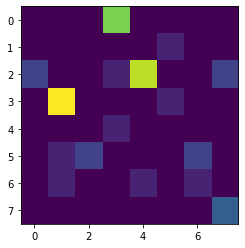

episode 100000
nombre de step : 5
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


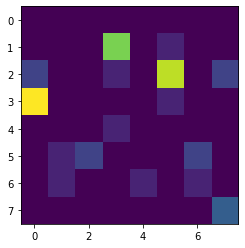

episode 100000
nombre de step : 6
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


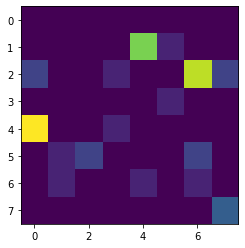

episode 100000
nombre de step : 7
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


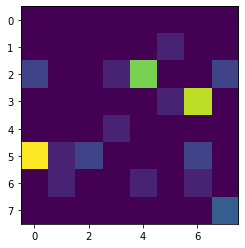

episode 100000
nombre de step : 8
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


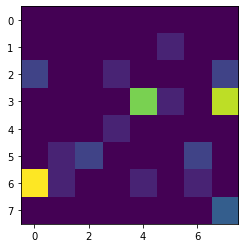

episode 100000
nombre de step : 9
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


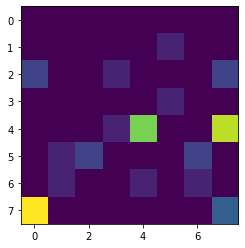

episode 100000
nombre de step : 10
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


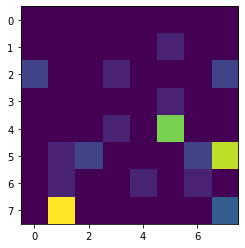

episode 100000
nombre de step : 11
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


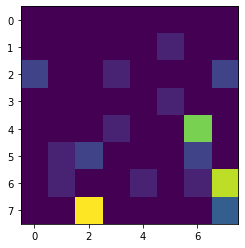

episode 100000
nombre de step : 12
rewards : [0, 1, 0]
previous done : [False, False, False]
done : [False, True, False]
terminated : False
game_over : False


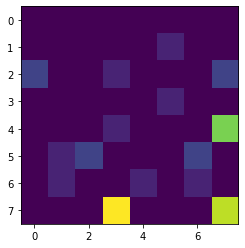

episode 100000
nombre de step : 13
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


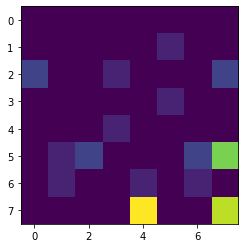

episode 100000
nombre de step : 14
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


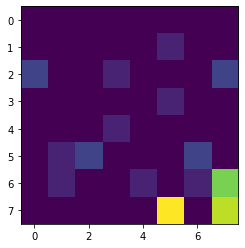

episode 100000
nombre de step : 15
rewards : [1, 1, 0]
previous done : [False, True, False]
done : [True, True, False]
terminated : False
game_over : False


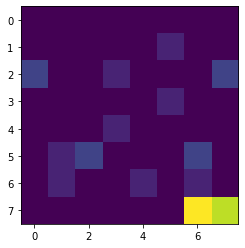

episode 100000
nombre de step : 16
rewards : [1, 1, 1]
previous done : [True, True, False]
done : [True, True, True]
terminated : True
game_over : True


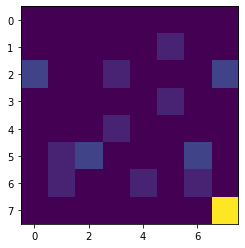

episode 100000
nombre de step : 1
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


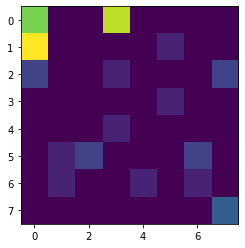

episode 100000
nombre de step : 2
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


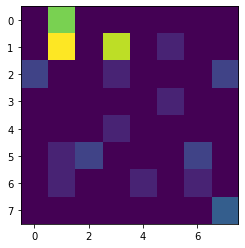

episode 100000
nombre de step : 3
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


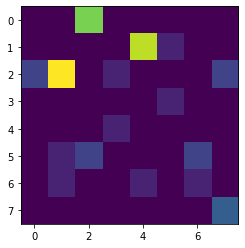

episode 100000
nombre de step : 4
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


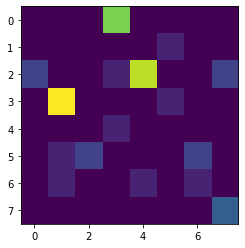

episode 100000
nombre de step : 5
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


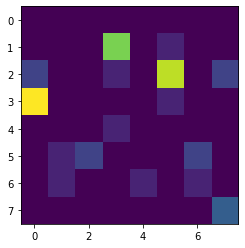

episode 100000
nombre de step : 6
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


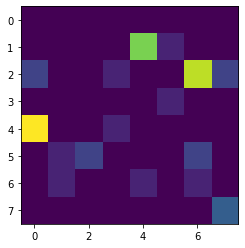

episode 100000
nombre de step : 7
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


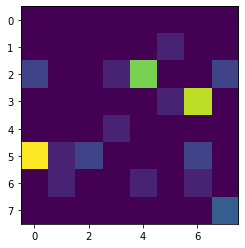

episode 100000
nombre de step : 8
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


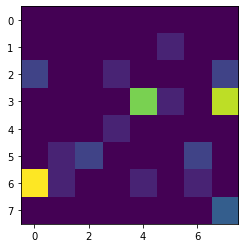

episode 100000
nombre de step : 9
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


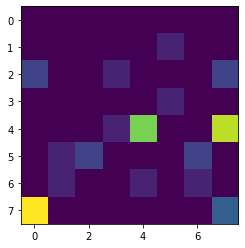

episode 100000
nombre de step : 10
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


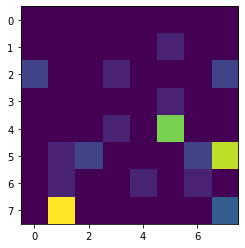

episode 100000
nombre de step : 11
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


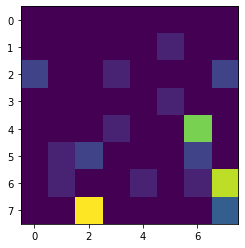

episode 100000
nombre de step : 12
rewards : [0, 1, 0]
previous done : [False, False, False]
done : [False, True, False]
terminated : False
game_over : False


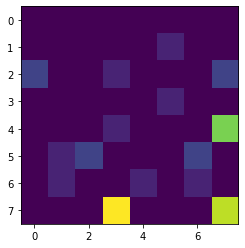

episode 100000
nombre de step : 13
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


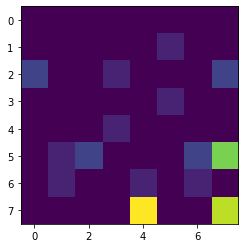

episode 100000
nombre de step : 14
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


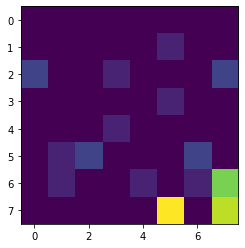

episode 100000
nombre de step : 15
rewards : [1, 1, 0]
previous done : [False, True, False]
done : [True, True, False]
terminated : False
game_over : False


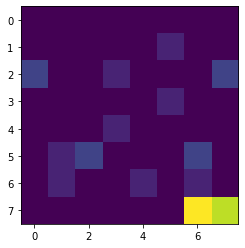

episode 100000
nombre de step : 16
rewards : [1, 1, 1]
previous done : [True, True, False]
done : [True, True, True]
terminated : True
game_over : True


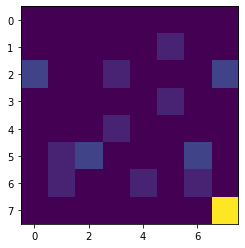

episode 100000
nombre de step : 1
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


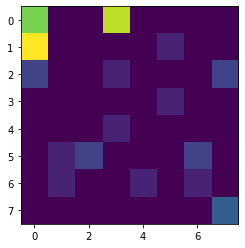

episode 100000
nombre de step : 2
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


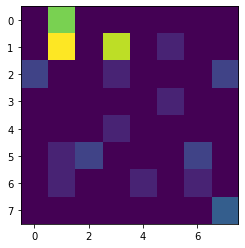

episode 100000
nombre de step : 3
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


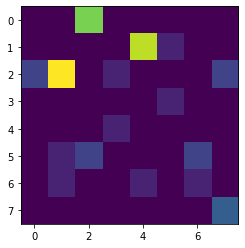

episode 100000
nombre de step : 4
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


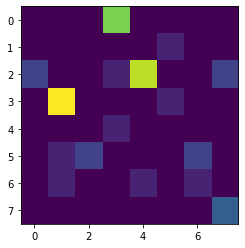

episode 100000
nombre de step : 5
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


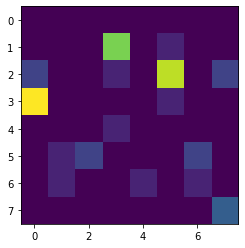

episode 100000
nombre de step : 6
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


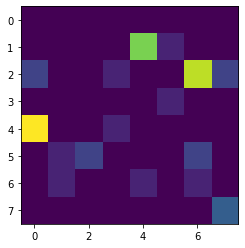

episode 100000
nombre de step : 7
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


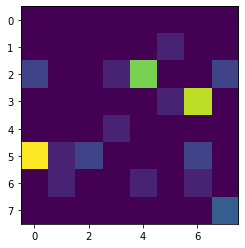

episode 100000
nombre de step : 8
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


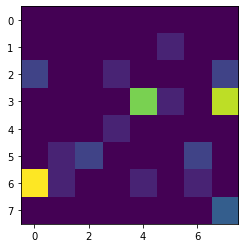

episode 100000
nombre de step : 9
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


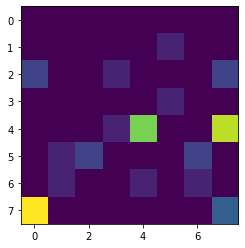

episode 100000
nombre de step : 10
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


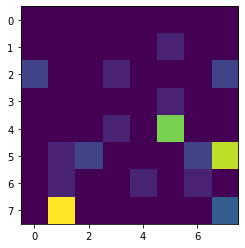

episode 100000
nombre de step : 11
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


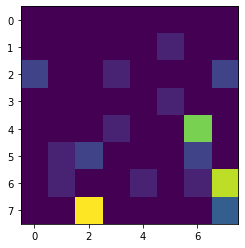

episode 100000
nombre de step : 12
rewards : [0, 1, 0]
previous done : [False, False, False]
done : [False, True, False]
terminated : False
game_over : False


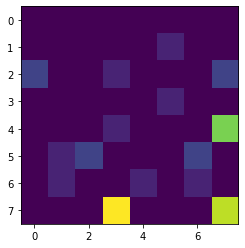

episode 100000
nombre de step : 13
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


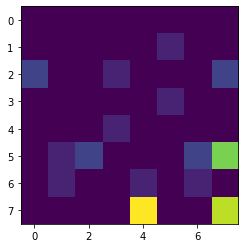

episode 100000
nombre de step : 14
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


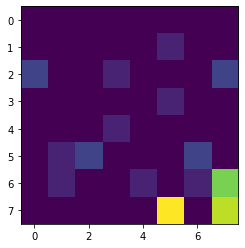

episode 100000
nombre de step : 15
rewards : [1, 1, 0]
previous done : [False, True, False]
done : [True, True, False]
terminated : False
game_over : False


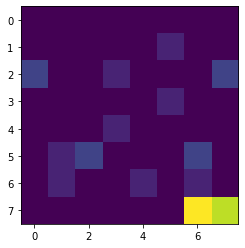

episode 100000
nombre de step : 16
rewards : [1, 1, 1]
previous done : [True, True, False]
done : [True, True, True]
terminated : True
game_over : True


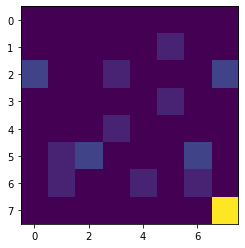

episode 100000
nombre de step : 1
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


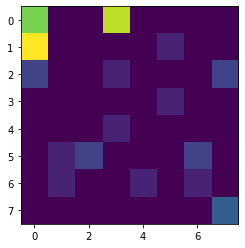

episode 100000
nombre de step : 2
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


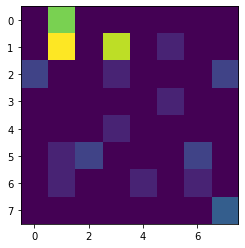

episode 100000
nombre de step : 3
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


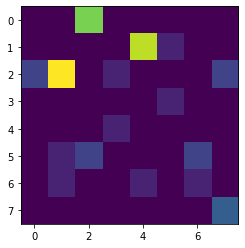

episode 100000
nombre de step : 4
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


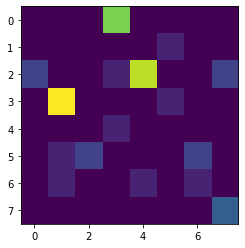

episode 100000
nombre de step : 5
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


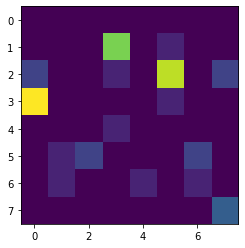

episode 100000
nombre de step : 6
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


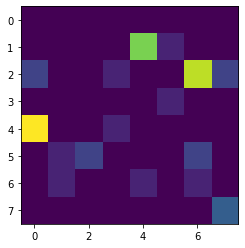

episode 100000
nombre de step : 7
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


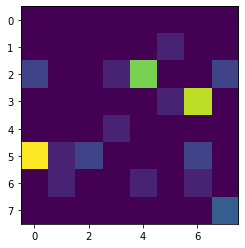

episode 100000
nombre de step : 8
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


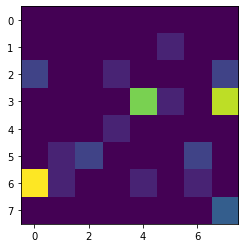

episode 100000
nombre de step : 9
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


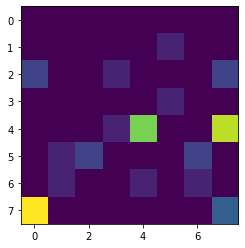

episode 100000
nombre de step : 10
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


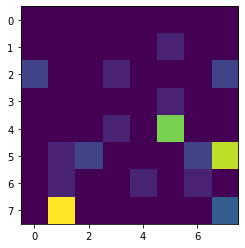

episode 100000
nombre de step : 11
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


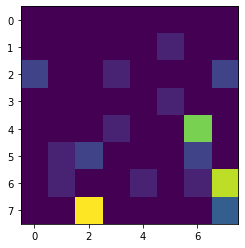

episode 100000
nombre de step : 12
rewards : [0, 1, 0]
previous done : [False, False, False]
done : [False, True, False]
terminated : False
game_over : False


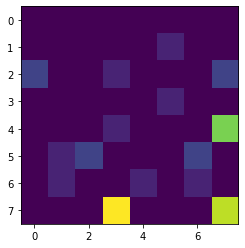

episode 100000
nombre de step : 13
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


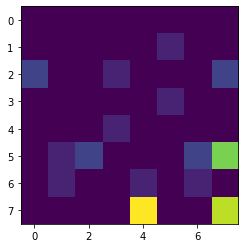

episode 100000
nombre de step : 14
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


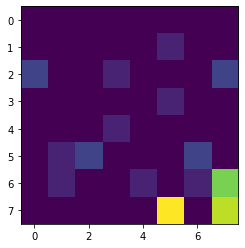

episode 100000
nombre de step : 15
rewards : [1, 1, 0]
previous done : [False, True, False]
done : [True, True, False]
terminated : False
game_over : False


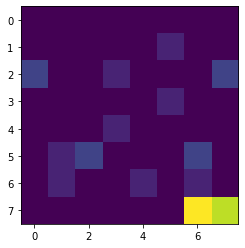

episode 100000
nombre de step : 16
rewards : [1, 1, 1]
previous done : [True, True, False]
done : [True, True, True]
terminated : True
game_over : True


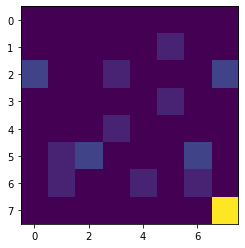

episode 100000
nombre de step : 1
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


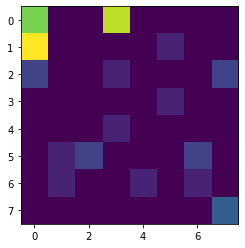

episode 100000
nombre de step : 2
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


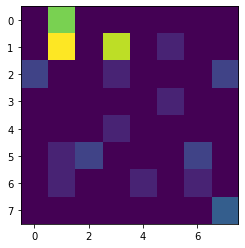

episode 100000
nombre de step : 3
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


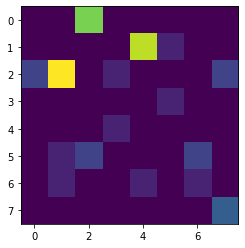

episode 100000
nombre de step : 4
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


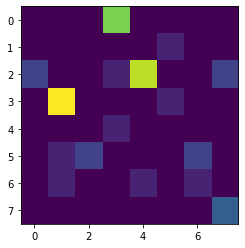

episode 100000
nombre de step : 5
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


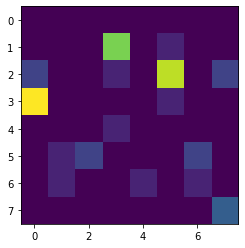

episode 100000
nombre de step : 6
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


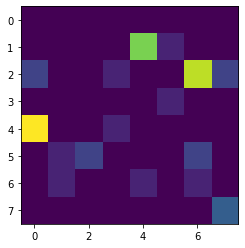

episode 100000
nombre de step : 7
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


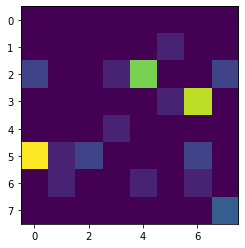

episode 100000
nombre de step : 8
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


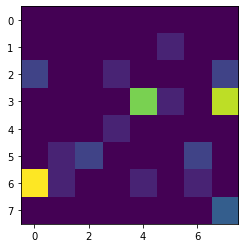

episode 100000
nombre de step : 9
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


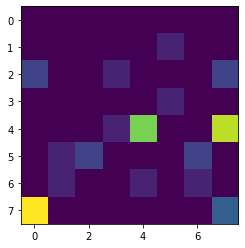

episode 100000
nombre de step : 10
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


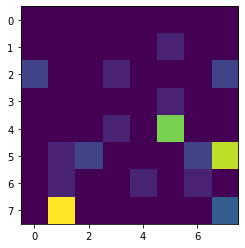

episode 100000
nombre de step : 11
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


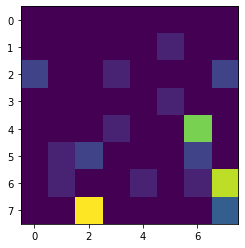

episode 100000
nombre de step : 12
rewards : [0, 1, 0]
previous done : [False, False, False]
done : [False, True, False]
terminated : False
game_over : False


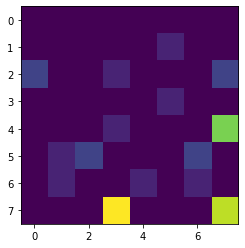

episode 100000
nombre de step : 13
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


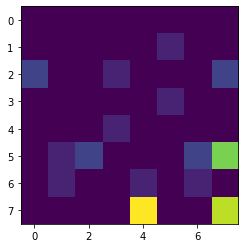

episode 100000
nombre de step : 14
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


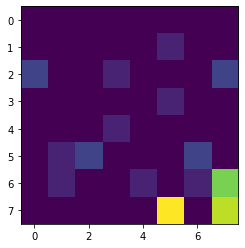

episode 100000
nombre de step : 15
rewards : [1, 1, 0]
previous done : [False, True, False]
done : [True, True, False]
terminated : False
game_over : False


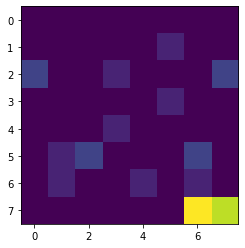

episode 100000
nombre de step : 16
rewards : [1, 1, 1]
previous done : [True, True, False]
done : [True, True, True]
terminated : True
game_over : True


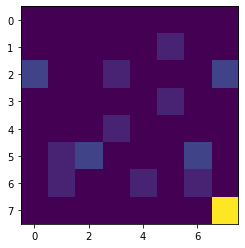

episode 100000
nombre de step : 1
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


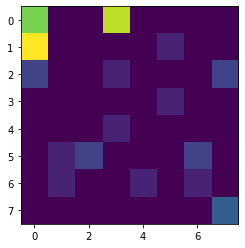

episode 100000
nombre de step : 2
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


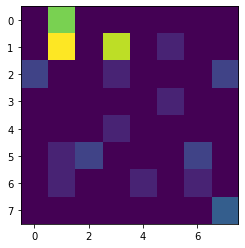

episode 100000
nombre de step : 3
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


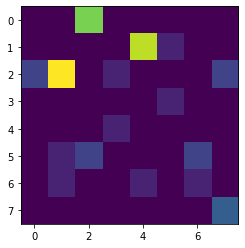

episode 100000
nombre de step : 4
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


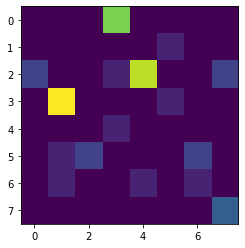

episode 100000
nombre de step : 5
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


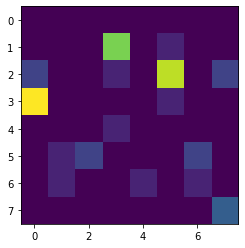

episode 100000
nombre de step : 6
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


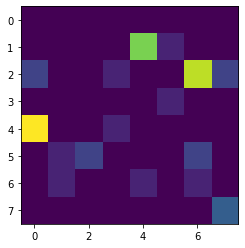

episode 100000
nombre de step : 7
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


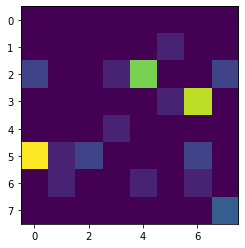

episode 100000
nombre de step : 8
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


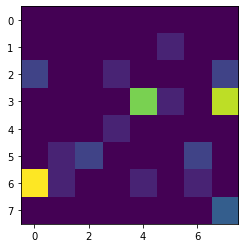

episode 100000
nombre de step : 9
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


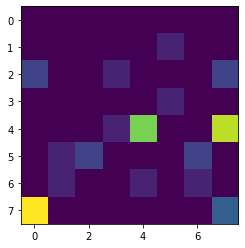

episode 100000
nombre de step : 10
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


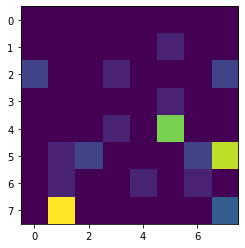

episode 100000
nombre de step : 11
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


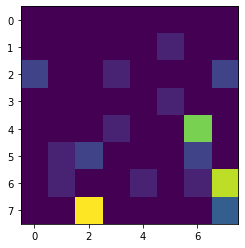

episode 100000
nombre de step : 12
rewards : [0, 1, 0]
previous done : [False, False, False]
done : [False, True, False]
terminated : False
game_over : False


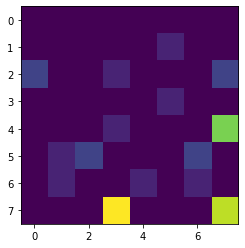

episode 100000
nombre de step : 13
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


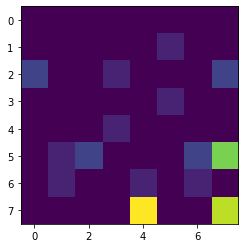

episode 100000
nombre de step : 14
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


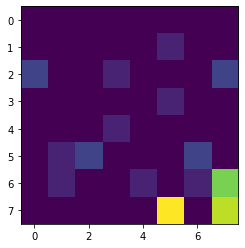

episode 100000
nombre de step : 15
rewards : [1, 1, 0]
previous done : [False, True, False]
done : [True, True, False]
terminated : False
game_over : False


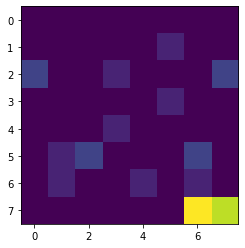

episode 100000
nombre de step : 16
rewards : [1, 1, 1]
previous done : [True, True, False]
done : [True, True, True]
terminated : True
game_over : True


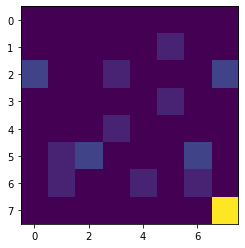

episode 100000
nombre de step : 1
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


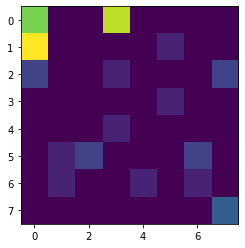

episode 100000
nombre de step : 2
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


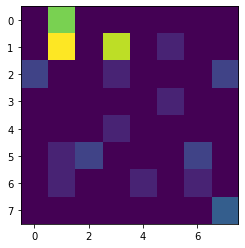

episode 100000
nombre de step : 3
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


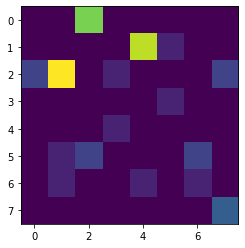

episode 100000
nombre de step : 4
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


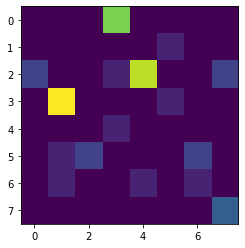

episode 100000
nombre de step : 5
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


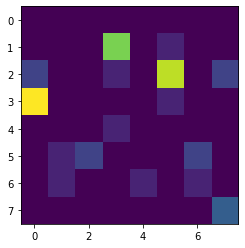

episode 100000
nombre de step : 6
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


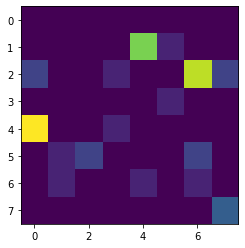

episode 100000
nombre de step : 7
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


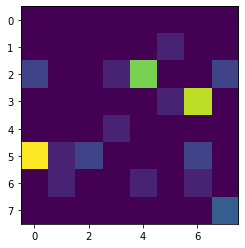

episode 100000
nombre de step : 8
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


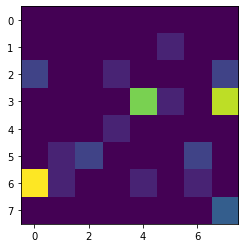

episode 100000
nombre de step : 9
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


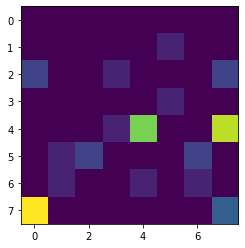

episode 100000
nombre de step : 10
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


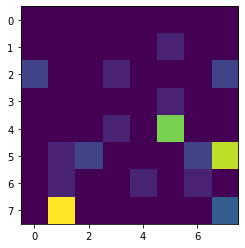

episode 100000
nombre de step : 11
rewards : [0, 0, 0]
previous done : [False, False, False]
done : [False, False, False]
terminated : False
game_over : False


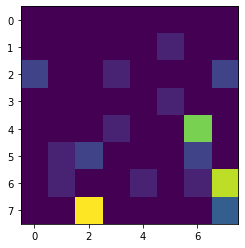

episode 100000
nombre de step : 12
rewards : [0, 1, 0]
previous done : [False, False, False]
done : [False, True, False]
terminated : False
game_over : False


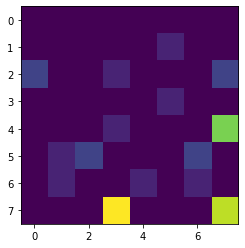

episode 100000
nombre de step : 13
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


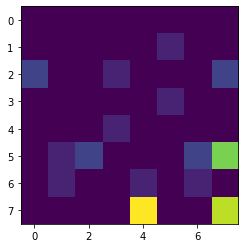

episode 100000
nombre de step : 14
rewards : [0, 1, 0]
previous done : [False, True, False]
done : [False, True, False]
terminated : False
game_over : False


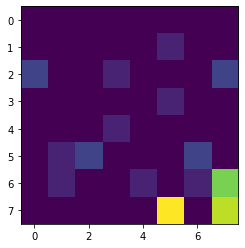

episode 100000
nombre de step : 15
rewards : [1, 1, 0]
previous done : [False, True, False]
done : [True, True, False]
terminated : False
game_over : False


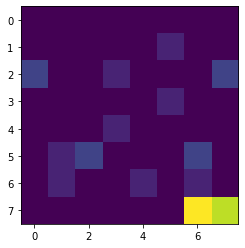

episode 100000
nombre de step : 16
rewards : [1, 1, 1]
previous done : [True, True, False]
done : [True, True, True]
terminated : True
game_over : True


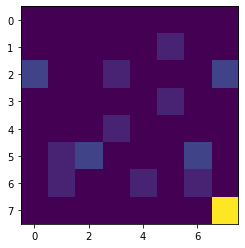

In [15]:
import numpy as np
import random

mapp = np.array([
    "FFFFFFFF",
    "FFFFFHFF",
    "SFFHFFFS",
    "FFFFFHFF",
    "FFFHFFFF",
    "FHSFFFSF",
    "FHFFHFHF",
    "FFFFFFFG",
])
# Create an environment with the map and two agents
env = Environment(mapp, 8, 3)

# Création des agents avec des positions initiales aléatoires
#agents = [Agent(np.random.randint(env.size_map**2), np.random.randint(5), 0) for _ in range(env.number_agent)]
agents = [Agent(0,0,0, False), Agent(3,0,0,False), Agent(8,0,0,False)]

# Création du jeu
game = Game(env, agents)

gamma = 0.9
alpha = 0.1

Q1 = np.zeros([env.size_map ** 2, 5])
Q2 = np.zeros([env.size_map ** 2, 5])
Q3 = np.zeros([env.size_map ** 2, 5])

action = [0, 0, 0]
nbEpisodes = 100000

epsilon = 1  # 1 = 100% random actions
epsilon_decay_rate = 1 / nbEpisodes       # epsilon decay rate. 1 / 0.0001 = 10,000
rng = np.random.default_rng()
  
for i in range(nbEpisodes):
    
    done = [False, False, False]
    terminated = False
    nbSteps = 0
    agent1_etat_action = []
    agent1_2_etat_action = []

    for j in range(3):
        game.reset(game.agents[j])
        #game.agents[j].state = np.random.randint(env.size_map**2)
    
    while (nbSteps< 60 and (not terminated)):
        
        state1 = game.agents[0].state
        state2 = game.agents[1].state
        state3 = game.agents[2].state
        
        
        if not(game.agents[0].done): # look if agent1 is in a hole or on the reward state
            # Epsilon Greedy for agent1
            if rng.random() < epsilon:
                action1 = np.random.choice([0, 1, 2, 3, 4])
            else:
                action1 = np.argmax(Q1[state1, :])
        else:
             action1 = 4 # rester sur place  
                
        action[0] = action1
        
            #Stocker le couple (etat,action) du premier agent pour le deuxieme agent
        if game.agents[0].etat_action() not in agent1_etat_action:
            agent1_etat_action.append(game.agents[0].etat_action())
        
         #Stocker le couple (etat,action) du premier agent pour le troisieme agent
        if game.agents[0].etat_action() not in agent1_2_etat_action:
            agent1_2_etat_action.append(game.agents[0].etat_action())

        if not(game.agents[1].done): # look if agent2 is in a hole or on the reward state
            # Epsilon Greedy for agent2
            if rng.random() < epsilon:
                action2 = np.random.choice([0, 1, 2, 3, 4])

            else:
                action2 = np.argmax(Q2[state2, :])
        else:
             action2 = 4 # rester sur place
                
        action[1] = action2
        
         #Stocker le couple (etat,action) du deuxieme agent pour le troisieme agent
        if game.agents[1].etat_action() not in agent1_2_etat_action:
            agent1_2_etat_action.append(game.agents[1].etat_action())

        if not(game.agents[2].done): # look if agent3 is in a hole or on the reward state
            # Epsilon Greedy for agent2
            if rng.random() < epsilon:
                action3 = np.random.choice([0, 1, 2, 3, 4])
            
            else:
                action3 = np.argmax(Q3[state3, :])
        else:
             action3 = 4 # rester sur place
                
        action[2] = action3
        #print(f"action: {action}")
        
        previous_done = done 
        
        next_states, rewards, done = game.step(action)
        #print(f"reward : {game.agents[0].reward , game.agents[1].reward,game.agents[2].reward}")

        if not previous_done[0]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q1[state1, action1] = Q1[state1, action1] + alpha * (
                game.agents[0].reward + gamma * np.max(Q1[game.agents[0].state, :]) - Q1[state1, action1])
            #print(f"Q1: {Q1[state1, action1]}")
            #print(f"previous_done: {Q1[state1, action1]}")


        if game.agents[1].etat_action() in agent1_etat_action:
            game.agents[1].reward =  game.agents[1].reward - 0.1
            
        
        if not previous_done[1]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q2[state2, action2] = Q2[state2, action2] + alpha * (
                        game.agents[1].reward + gamma * np.max(Q2[game.agents[1].state, :]) - Q2[state2, action2])
            #print(f"Q2: {Q2[state2, action2]}")
        
        if game.agents[2].etat_action() in agent1_2_etat_action:# and epsilon <=0.1:
            game.agents[2].reward =  game.agents[2].reward -  0.1
            

        
            
        if not previous_done[2]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q3[state3, action3] = Q3[state3, action3] + alpha * (
                        game.agents[2].reward + gamma * np.max(Q3[game.agents[2].state, :]) - Q3[state3, action3])
            #print(f"Q3: {Q3[state3, action3]}")

        
        nbSteps += 1
        if epsilon == 0:
            alpha = 0.01
        terminated = game.game_over()  
        
        if i > nbEpisodes - 10:
            print(f"episode {nbEpisodes}")
            print(f"nombre de step : {nbSteps}")
            print(f"rewards : {rewards}")
            print(f"previous done : {previous_done}")

            print(f"done : {done}")
            print(f"terminated : {terminated}")
            print(f"game_over : {game.game_over()}")
            #print(f"Q[state,action]: {Q1[state1, action1], Q2[state2, action2], Q3[state3, action3]}")
            game.display()
              
    epsilon = max(epsilon - epsilon_decay_rate, 0)


# Test du Q_learning 8x8 avec trois agents 

In [21]:
mapp = np.array([
    "FFFFFFFF",
    "FFFFFHFF",
    "SFFHFFFS",
    "FFFFFHFF",
    "FFFHFFFF",
    "FHSFFFSF",
    "FHFFHFHF",
    "FFFFFFFG",
])
# Create an environment with the map and two agents
env3 = Environment(mapp, 8, 3)

# Création des agents avec des positions initiales aléatoires
#agents = [Agent(np.random.randint(env.size_map**2), np.random.randint(5), 0) for _ in range(env.number_agent)]
agents = [Agent(0,0,0, False), Agent(3,0,0,False), Agent(8,0,0,False)]

# Création du jeu
game3 = Game(env3, agents)


for i in range(10):
    print(f"########################## episode {i + 1}  #############################")
    
    terminated = False
    nbSteps = 0
    for j in range(3):
        game3.reset(game3.agents[j])
        
        #print( game2.agents[0].done, game2.agents[0].done)
    while (nbSteps< 30 and not terminated):
         

        state1 = game3.agents[0].state
        state2 = game3.agents[1].state
        state3 = game3.agents[2].state

        # Epsilon Greedy pour l'agent 1 (exploitation uniquement)
        if not(game3.agents[0].done):
            action1 = np.argmax(Q1[state1, :])
        else:
             action1 = 4

        # Epsilon Greedy pour l'agent 2 (exploitation uniquement)
        if not(game3.agents[1].done):
            action2 = np.argmax(Q2[state2, :])
        else:
             action2 = 4
        
         # Epsilon Greedy pour l'agent 3 (exploitation uniquement)
        if not(game3.agents[2].done):
            action3 = np.argmax(Q3[state3, :])
        else:
             action3 = 4
                
        action = [action1, action2, action3]
           
        # Effectuer l'étape avec les actions choisies
        next_states, rewards, done = game3.step(action)
        nbSteps += 1
        
        terminated = game3.game_over()
    
        #print(f"nombre de step : {nbSteps}")
        #print(f"rewards : {rewards}")
       # print(f"done : {done}")
        #print(f"terminated : {terminated}")
        #print(f"game_over : {game3.game_over()}")
        #game3.display()
        game3.save_history()

#print(game1.history)
game3.render()
        

        

########################## episode 1  #############################
########################## episode 2  #############################
########################## episode 3  #############################
########################## episode 4  #############################
########################## episode 5  #############################
########################## episode 6  #############################
########################## episode 7  #############################
########################## episode 8  #############################
########################## episode 9  #############################
########################## episode 10  #############################
Game quit


# Rapport du 21/03/24

In this section, we aim to explore whether our agents can effectively learn to avoid collisions when they simultaneously make identical decisions (state,actions). We've modified our environment so that all agents can move at the same time. However, we've observed that our agents struggle to anticipate each other's actions, leading to frequent collisions. This outcome contrasts with our initial environment, where agents moved sequentially(one after the other), we noticed that often the agents can wait the others to pass before taken an action or move back one step to give the way to the other agent. to avoid collision.

Furthermore,we also try to separate each game from the others. Unlike the previous section, where we conducted one continuous "infinite game," we've now structured the gameplay into discrete episodes, each with a finite duration. Additionally, we've introduced rules to the game; for instance, if all agents perish or achieve victory, the game resets. Moreover, if any agent triumphs, the game doesn't reset until all other agents either succeed or fail. This rule prevents any single agent from significantly outpacing the others in learning speed, ensuring a balanced learning rate among all agents.

Since we've transitioned from infinite episodes to independent episodes, we must adapt our Q-learning algorithm accordingly. Specifically, when updating the rewards for agents other than the first one, we only consider the state-action pairs encountered by those agents within the same episode. This approach maintains the independence of each episode while allowing for focused reward updates based on interactions within the current game.

In our experiments with 4x4 or 8x8 maps and two agents, we've observed satisfactory convergence of the Q-learning algorithm, with both agents developing diverse policies. However, a persistent challenge remains: training three agents simultaneously proves ineffective, as one agent consistently fails to learn(oftentime the third one), reiterating the limitations encountered in the previous section.

# Rapport du 22/03/24

We are currently exploring the problem domain using Q-learning with an 8x8 map and three agents. By adjusting the hyperparameters alpha and gamma, we aim to find optimal Q-tables that enable our agents to learn effectively.

Initially, we experimented with two agents and one reward on the map. Regardless of whether we initialized them close together or far apart, our agents demonstrated significant learning. Subsequently, we extended our trials to two agents with two rewards, and again observed successful learning. Interestingly, each agent developed a diverse policy, with individual paths to the nearest reward to them.

Next, we introduced a scenario with three agents and two rewards. We noticed that the two nearest agents tended to converge towards the first reward, while the third agent pursued the second reward. Even when initialized in the same area, this behavior persisted.

Subsequently, we investigated a scenario with three agents and one reward, all starting from the same area.Here we observed that one or two agents consistently struggled to learn. This was further confirmed through experiments involving the evaluation of our Q-tables after 300,000 episodes.

asup.

Another challenge arose when randomly initializing agents for the evaluation of our Q-tables. Despite increasing the number of episodes, our agents struggled to reach the reward on the map consistently. Interestingly, randomly initializing agents on a 4x4 map give more favorable results.

# Q learning avec l'hyperparametres variable

In [162]:
import numpy as np
import random

mapp = np.array([
    "FFFFFFFF",
    "FFFFFHFF",
    "SFFHFFFS",
    "FFFFFHFF",
    "FFFHFFFF",
    "FHSFFFHF",
    "FHGFHFHF",
    "FFFHFFFF",
])
# Create an environment with the map and two agents
env = Environment(mapp, 8, 3)

# Création des agents avec des positions initiales aléatoires
agents = [Agent(8,0,0, False), Agent(0,0,0,False), Agent(3,0,0,False)]

# Création du jeu
game = Game(env, agents)

gamma = 0.9
alpha = 0.1

Q1 = np.zeros([env.size_map ** 2, 5])
Q2 = np.zeros([env.size_map ** 2, 5])
Q3 = np.zeros([env.size_map ** 2, 5])

action = [0, 0, 0]
nbEpisodes = 100000

epsilon = 1  # 1 = 100% random actions
epsilon_decay_rate = 1 / nbEpisodes       # epsilon decay rate. 1 / 0.0001 = 10,000
rng = np.random.default_rng()
  
for i in range(nbEpisodes):
    
    done = [False, False, False]
    terminated = False
    nbSteps = 0
    agent1_etat_action = []
    agent1_2_etat_action = []

    for j in range(3):
        game.reset(game.agents[j])
        #game.agents[j].state = np.random.randint(env.size_map**2)
    
    while (nbSteps< 60 and (not terminated)):
        
        state1 = game.agents[0].state
        state2 = game.agents[1].state
        state3 = game.agents[2].state
        
      
        if not(game.agents[0].done): # look if agent1 is in a hole or on the reward state
            # Epsilon Greedy for agent1
            if rng.random() < epsilon:
                action1 = np.random.choice([0, 1, 2, 3, 4])
            else:
                action1 = np.argmax(Q1[state1, :])
        else:
             action1 = 4 # rester sur place  
                
        action[0] = action1
        
            #Stocker le couple (etat,action) du premier agent pour le deuxieme agent
        if game.agents[0].etat_action() not in agent1_etat_action:
            agent1_etat_action.append(game.agents[0].etat_action())
        
         #Stocker le couple (etat,action) du premier agent pour le troisieme agent
        if game.agents[0].etat_action() not in agent1_2_etat_action:
            agent1_2_etat_action.append(game.agents[0].etat_action())

        if not(game.agents[1].done): # look if agent2 is in a hole or on the reward state
            
            # Epsilon Greedy for agent2
            if rng.random() < epsilon:
                action2 = np.random.choice([0, 1, 2, 3, 4])

            else:
                action2 = np.argmax(Q2[state2, :])
        else:
             action2 = 4 # rester sur place
                
        action[1] = action2
        
         #Stocker le couple (etat,action) du deuxieme agent pour le troisieme agent
        if game.agents[1].etat_action() not in agent1_2_etat_action:
            agent1_2_etat_action.append(game.agents[1].etat_action())

        if not(game.agents[2].done): # look if agent3 is in a hole or on the reward state
            # Epsilon Greedy for agent2
            if rng.random() < epsilon:
                action3 = np.random.choice([0, 1, 2, 3, 4])
            
            else:
                action3 = np.argmax(Q3[state3, :])
        else:
             action3 = 4 # rester sur place
                
        action[2] = action3
        
        previous_done = done 
        
        next_states, rewards, done = game.step(action)

        if not previous_done[0]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q1[state1, action1] = Q1[state1, action1] + alpha * (
                game.agents[0].reward + gamma * np.max(Q1[game.agents[0].state, :]) - Q1[state1, action1])

        if game.agents[1].etat_action() in agent1_etat_action:
            game.agents[1].reward =  game.agents[1].reward - game.novelty(game.agents[1], [0, 0.1,0.02,0.01])
            #print(game.novelty(game.agents[1], 0.1))
            
        if not previous_done[1]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q2[state2, action2] = Q2[state2, action2] + alpha * (
                        game.agents[1].reward + gamma * np.max(Q2[game.agents[1].state, :]) - Q2[state2, action2])
        
        
        if game.agents[2].etat_action() in agent1_2_etat_action:# and epsilon <=0.1:
       
            game.agents[2].reward =  game.agents[2].reward  - game.novelty(game.agents[2], [0, 0.2,0.02,0.01])

            
       
            
        if not previous_done[2]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q3[state3, action3] = Q3[state3, action3] + alpha * (
                        game.agents[2].reward + gamma * np.max(Q3[game.agents[2].state, :]) - Q3[state3, action3])

        
        nbSteps += 1
        if epsilon == 0:
            alpha = 0.01
        terminated = game.game_over()    
       
    epsilon = max(epsilon - epsilon_decay_rate, 0)


# Test du Q_learning avec le l'hyperparametre de novelty variable

########################## episode 1  #############################


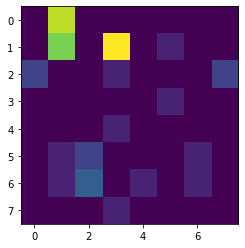

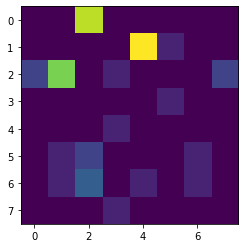

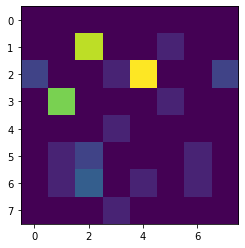

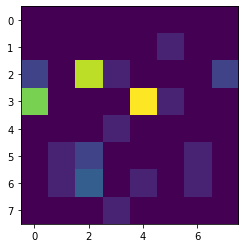

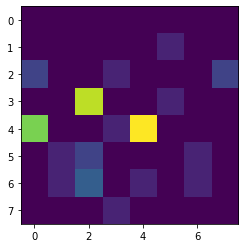

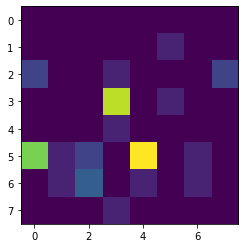

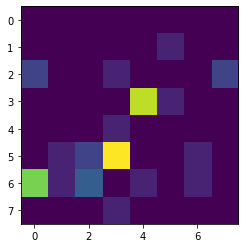

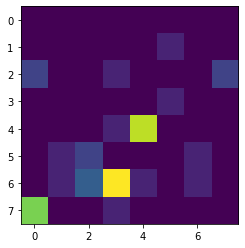

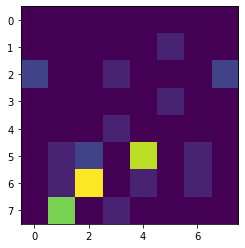

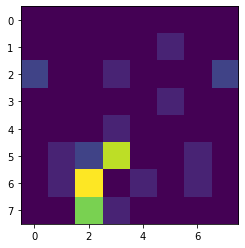

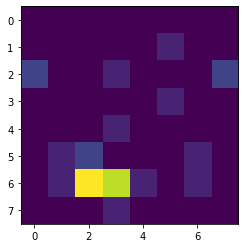

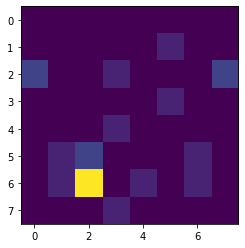

########################## episode 2  #############################


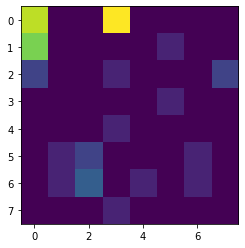

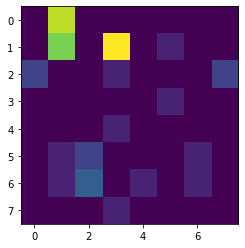

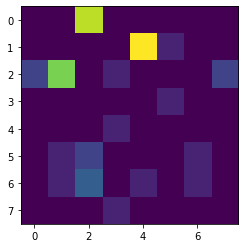

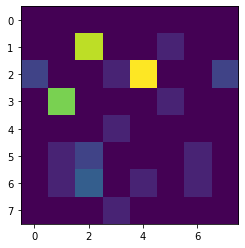

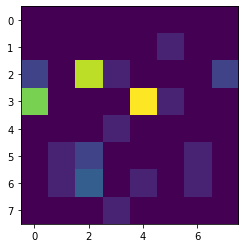

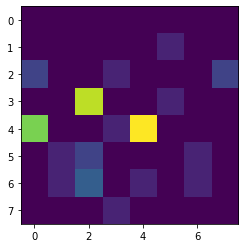

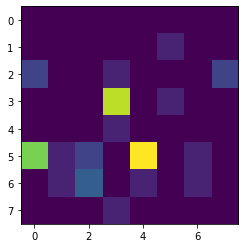

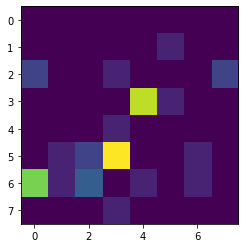

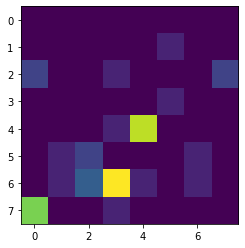

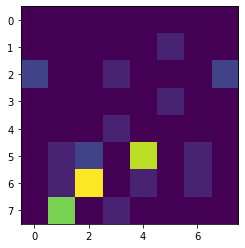

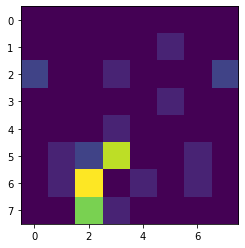

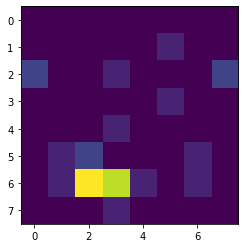

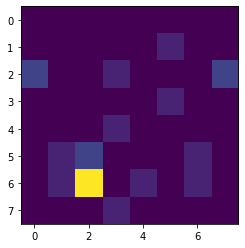

########################## episode 3  #############################


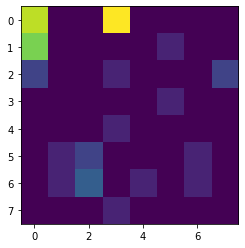

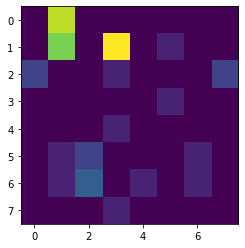

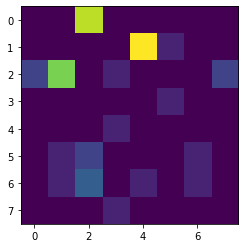

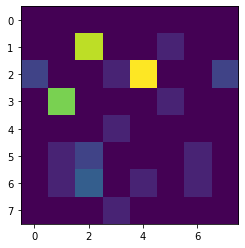

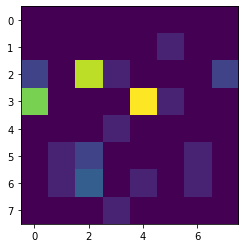

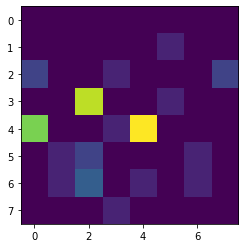

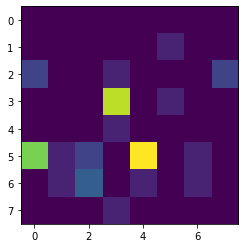

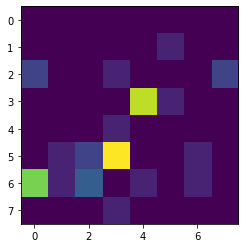

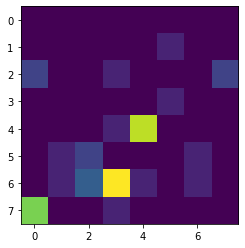

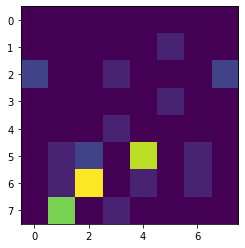

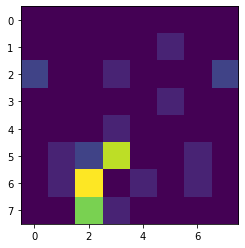

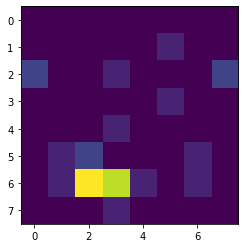

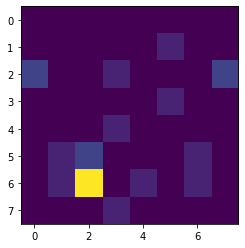

########################## episode 4  #############################


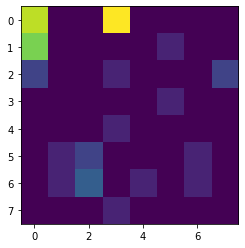

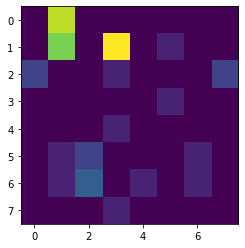

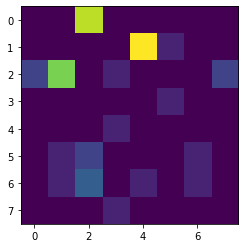

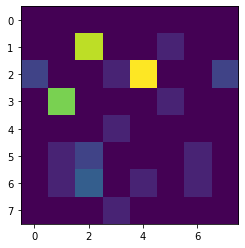

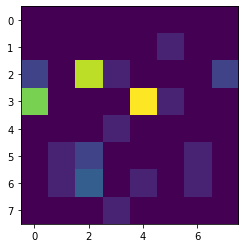

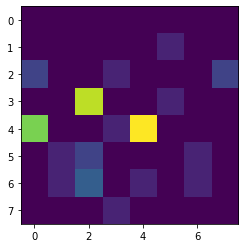

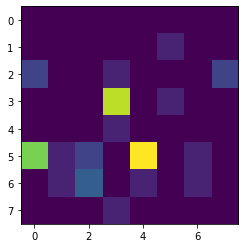

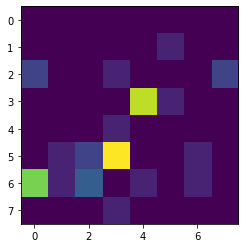

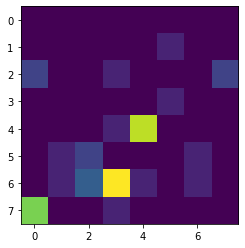

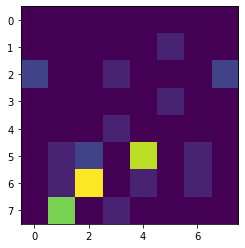

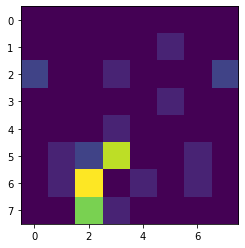

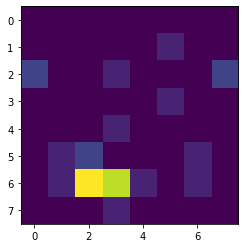

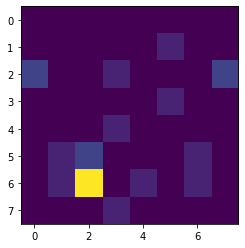

########################## episode 5  #############################


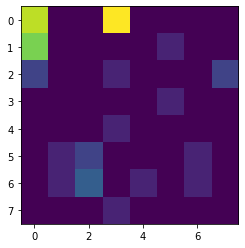

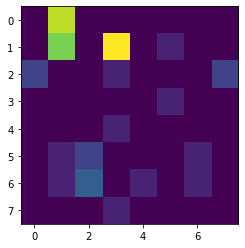

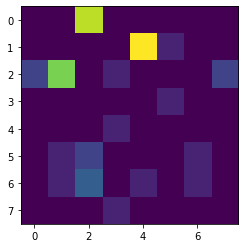

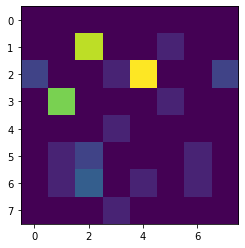

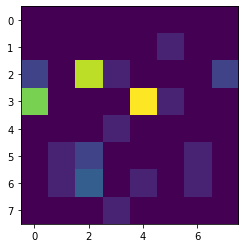

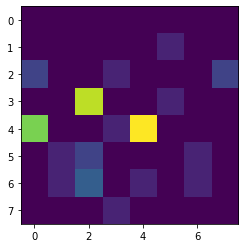

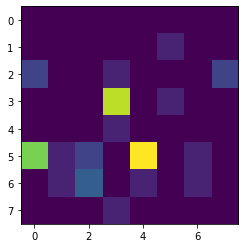

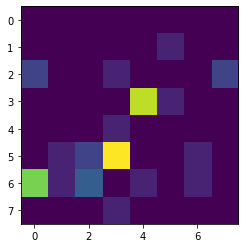

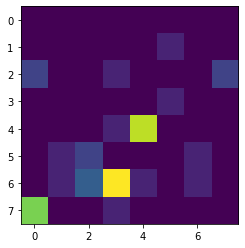

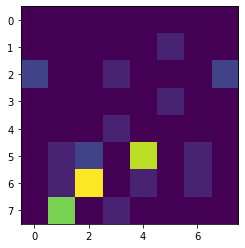

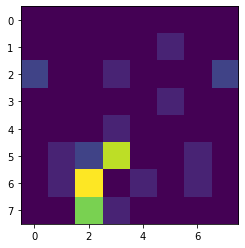

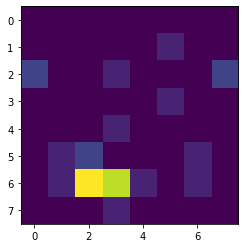

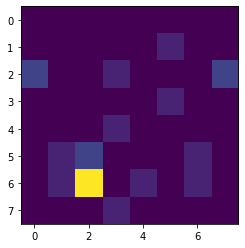

########################## episode 6  #############################


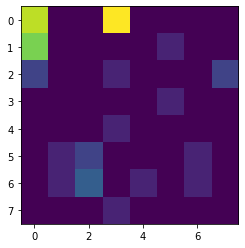

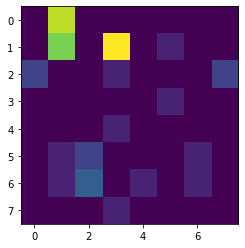

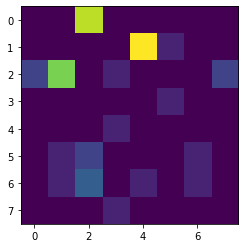

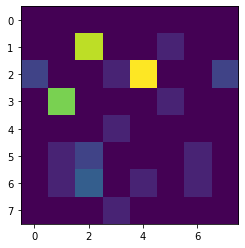

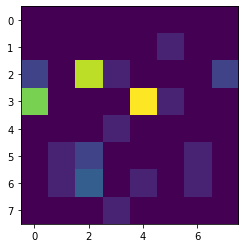

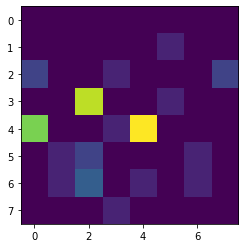

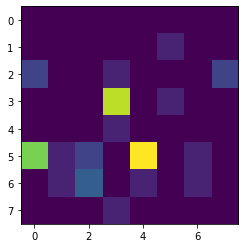

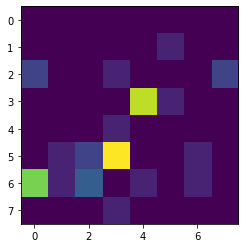

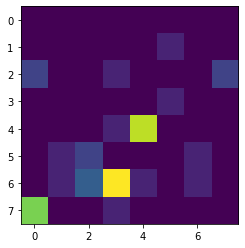

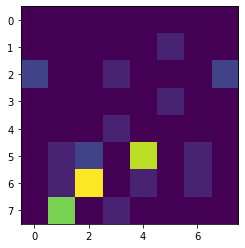

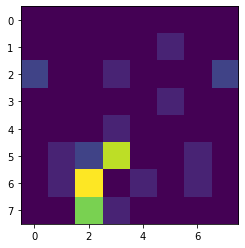

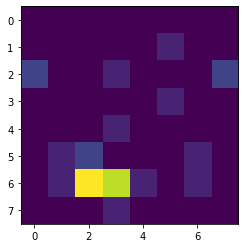

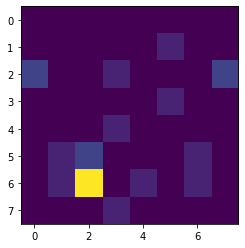

########################## episode 7  #############################


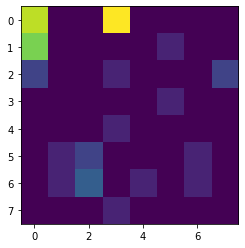

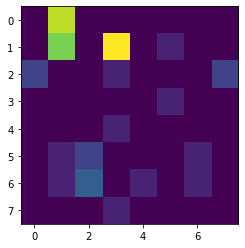

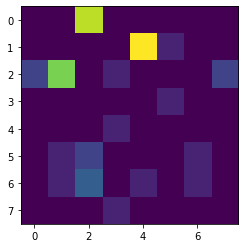

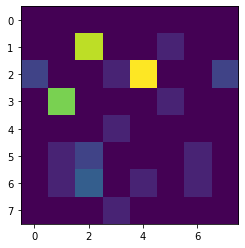

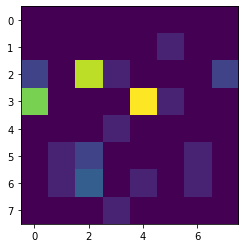

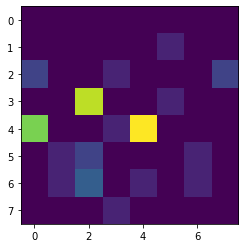

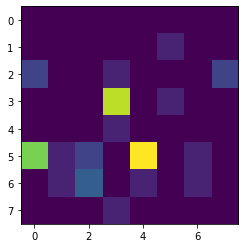

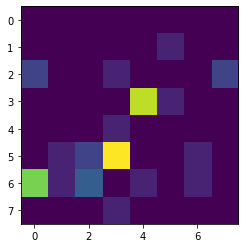

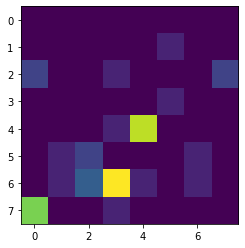

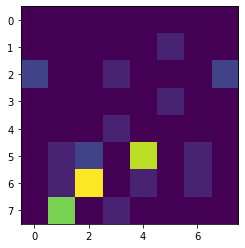

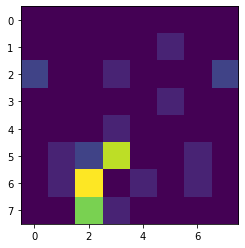

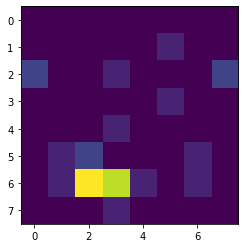

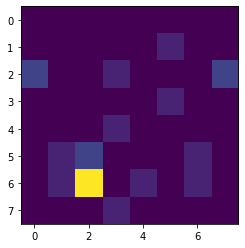

########################## episode 8  #############################


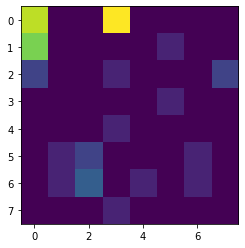

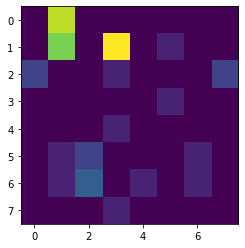

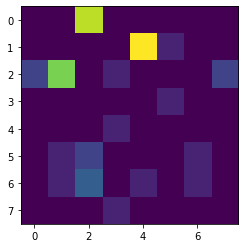

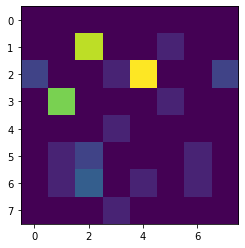

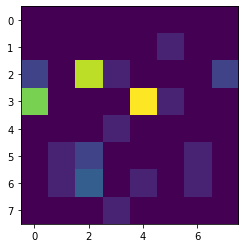

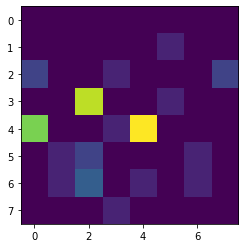

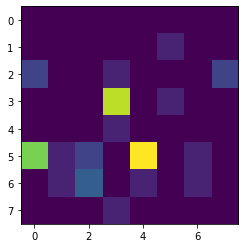

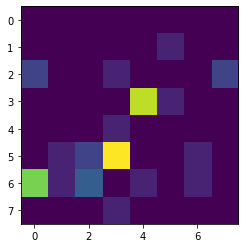

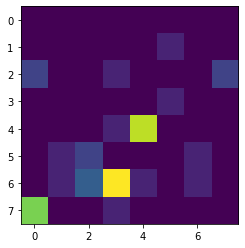

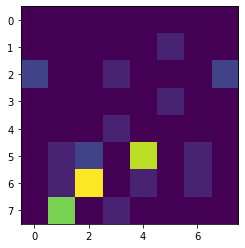

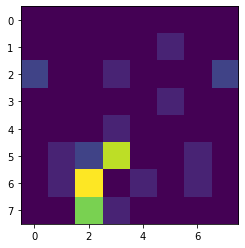

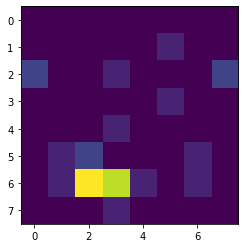

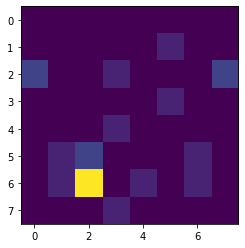

########################## episode 9  #############################


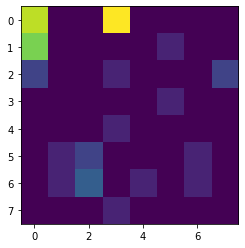

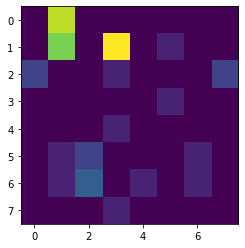

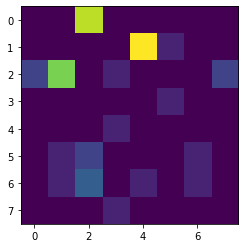

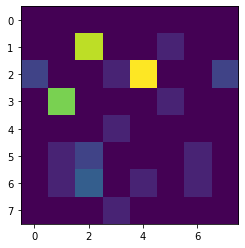

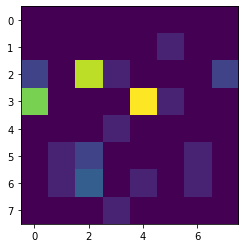

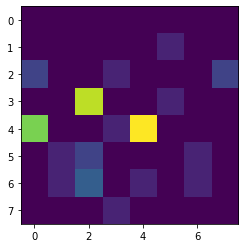

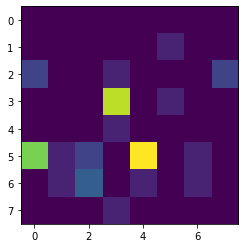

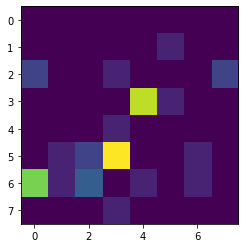

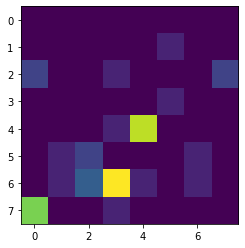

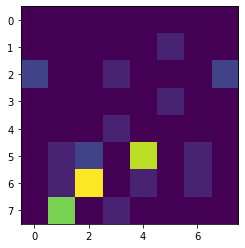

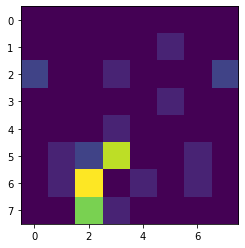

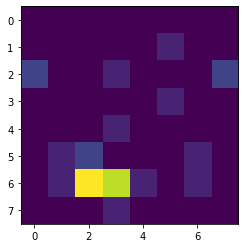

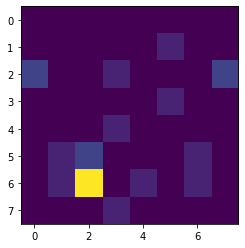

########################## episode 10  #############################


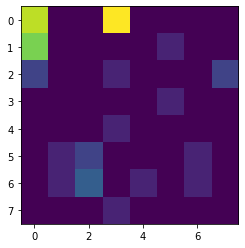

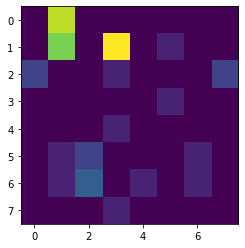

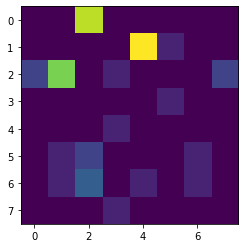

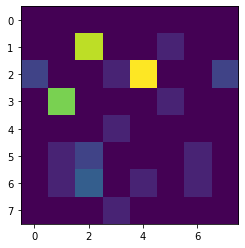

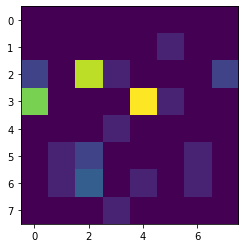

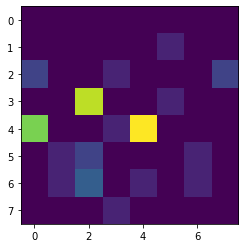

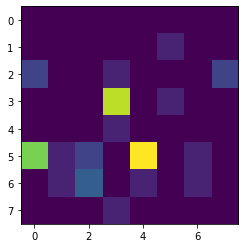

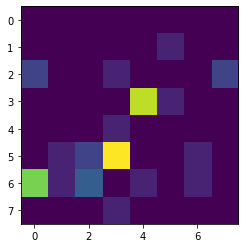

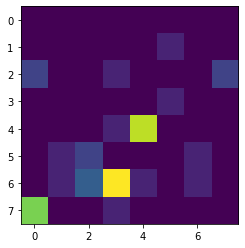

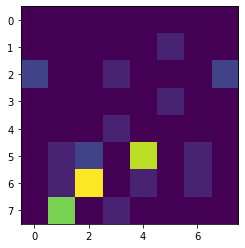

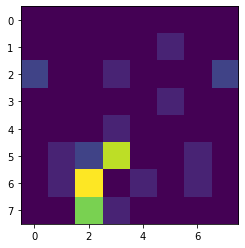

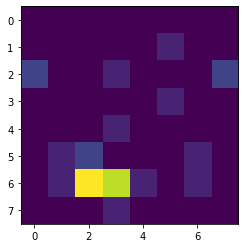

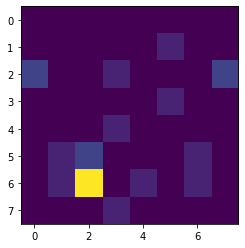

In [165]:
mapp = np.array([
    "FFFFFFFF",
    "FFFFFHFF",
    "SFFHFFFS",
    "FFFFFHFF",
    "FFFHFFFF",
    "FHSFFFHF",
    "FHGFHFHF",
    "FFFHFFFF",
])
# Create an environment with the map and two agents
env4 = Environment(mapp, 8, 3)

# Création des agents avec des positions initiales aléatoires
#agents = [Agent(np.random.randint(env.size_map**2), np.random.randint(5), 0) for _ in range(env.number_agent)]
agents = [Agent(8,0,0, False), Agent(0,0,0,False), Agent(3,0,0,False)]
# Création du jeu
game4 = Game(env4, agents)


for i in range(10):
    print(f"########################## episode {i + 1}  #############################")
    
    terminated = False
    nbSteps = 0
    for j in range(3):
        game4.reset(game4.agents[j])
        
        #print( game2.agents[0].done, game2.agents[0].done)
    while (nbSteps< 30 and not terminated):
        
        state1 = game4.agents[0].state
        state2 = game4.agents[1].state
        state3 = game4.agents[2].state

        # Epsilon Greedy pour l'agent 1 (exploitation uniquement)
        if not(game4.agents[0].done):
            action1 = np.argmax(Q1[state1, :])
        else:
             action1 = 4

        # Epsilon Greedy pour l'agent 2 (exploitation uniquement)
        if not(game4.agents[1].done):
            action2 = np.argmax(Q2[state2, :])
        else:
             action2 = 4
        
         # Epsilon Greedy pour l'agent 3 (exploitation uniquement)
        if not(game4.agents[2].done):
            action3 = np.argmax(Q3[state3, :])
        else:
             action3 = 4
                
        action = [action1, action2, action3]
        
        # Effectuer l'étape avec les actions choisies
        next_states, rewards, done = game4.step(action)
        nbSteps += 1
        
        terminated = game4.game_over()
        
        game4.display()

        

# Qlearning simultanous

In [180]:
import numpy as np
import random

mapp = np.array([
    "FFFFFFFF",
    "FFFFHFFF",
    "SFFHFFFS",
    "FFFFFHFF",
    "FFFHFFFF",
    "FHSFFFHF",
    "FHGFHFHF",
    "FFFHFFFF",
])
# Create an environment with the map and two agents
env = Environment(mapp, 8, 2)

# Création des agents avec des positions initiales aléatoires
#agents = [Agent(np.random.randint(env.size_map**2), np.random.randint(5), 0) for _ in range(env.number_agent)]
agents = [Agent(4,0,0,False), Agent(5,0,0,False)]

# Création du jeu
game = Game(env, agents)

gamma = 0.9
alpha = 0.1

Q1 = np.zeros([env.size_map ** 2, 5])
Q2 = np.zeros([env.size_map ** 2, 5])
action = [0, 0]
nbEpisodes = 100000

epsilon = 1  # 1 = 100% random actions
epsilon_decay_rate = 1 / nbEpisodes       # epsilon decay rate. 1 / 0.0001 = 10,000
rng = np.random.default_rng()
  
for i in range(nbEpisodes):
    
    done = [False, False]
    terminated =  False
    nbSteps = 0
    agent1_etat_action = []
    agent2_etat_action = []

    for j in range(2):
        game.reset(game.agents[j])
    while (nbSteps<= 60 and (not terminated)):
 
        state1 = game.agents[0].state
        state2 = game.agents[1].state

        if not(game.agents[0].done): # look if agent1 is in a hole or on the reward state
            # Epsilon Greedy for agent1
            if rng.random() < epsilon:
                action1 = np.random.choice([0, 1, 2, 3, 4])
            else:
                action1 = np.argmax(Q1[state1, :])
        else:
             action1 = 4 # rester sur place  
                
        action[0] = action1
        
            #Stocker le couple (etat,action) du premier agent
        if game.agents[0].etat_action() not in agent1_etat_action:
            agent1_etat_action.append(game.agents[0].etat_action())

        if not(game.agents[1].done): # look if agent1 is in a hole or on the reward state
            # Epsilon Greedy for agent2
            if rng.random() < epsilon:
                action2 = np.random.choice([0, 1, 2, 3, 4])

            else:
                action2 = np.argmax(Q2[state2, :])
        else:
             action2 = 4 # rester sur place
                
        action[1] = action2
        
            #Stocker le couple (etat,action) du second agent
        if game.agents[1].etat_action() not in agent2_etat_action:
            agent2_etat_action.append(game.agents[1].etat_action())

        previous_done = done 
        
        next_states, rewards, done = game.step(action)

        if game.agents[0].etat_action() in agent2_etat_action:
            game.agents[0].reward = game.agents[0].reward - 0.3
        
        
        if not previous_done[0]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q1[state1, action1] = Q1[state1, action1] + alpha * (
                game.agents[0].reward + gamma * np.max(Q1[game.agents[0].state, :]) - Q1[state1, action1])

        if game.agents[1].etat_action() in agent1_etat_action:
            game.agents[1].reward = game.agents[1].reward - 0.3
        
        else:
            game.agents[1].reward = game.agents[1].reward
        
        if not previous_done[1]: # don't update the Q_table while your agent is in a hole or on the reward state
            Q2[state2, action2] = Q2[state2, action2] + alpha * (
                        game.agents[1].reward + gamma * np.max(Q2[game.agents[1].state, :]) - Q2[state2, action2])

        nbSteps += 1
        
        if epsilon == 0:
            alpha = 0.01
        terminated = game.game_over()    

    epsilon = max(epsilon - epsilon_decay_rate, 0)

      

# Test du Qlearning simultanuous avec 2 agent

episode 1


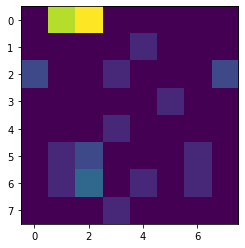

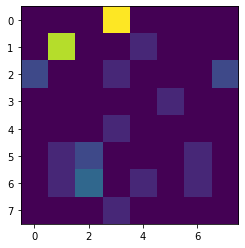

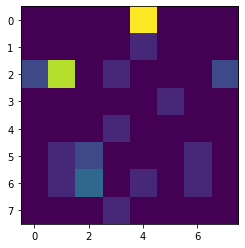

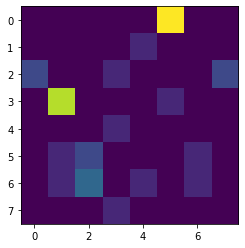

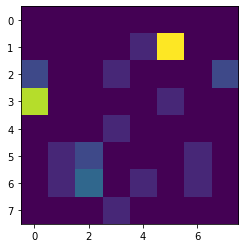

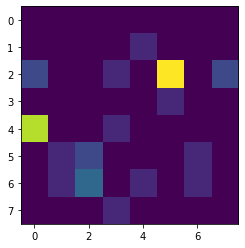

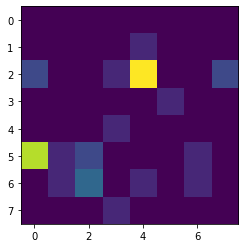

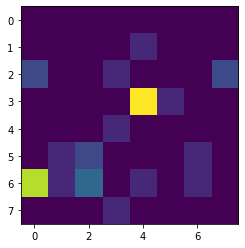

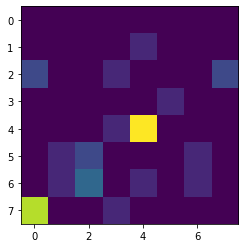

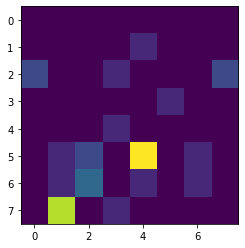

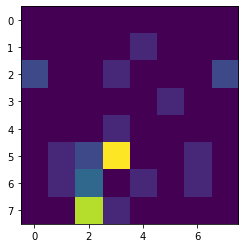

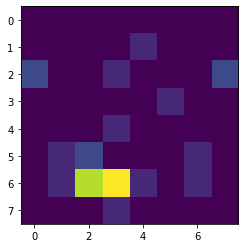

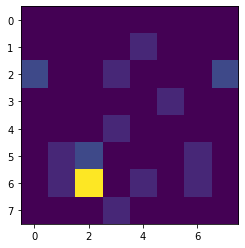

episode 2


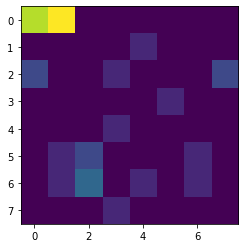

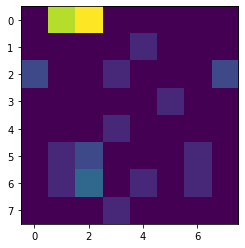

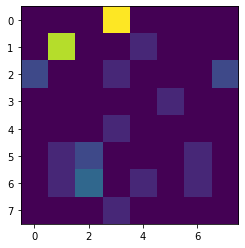

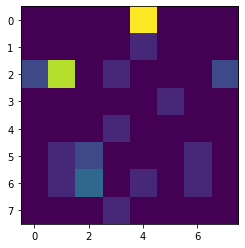

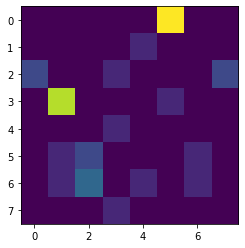

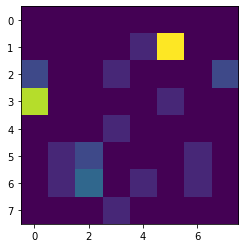

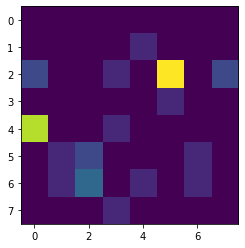

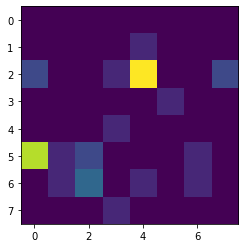

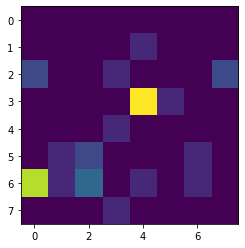

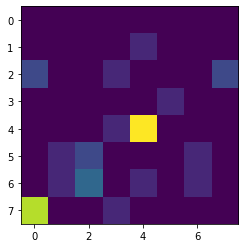

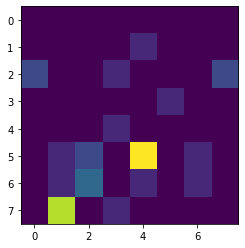

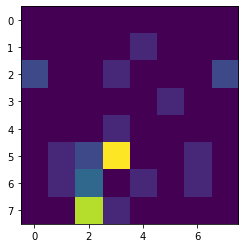

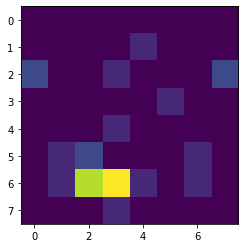

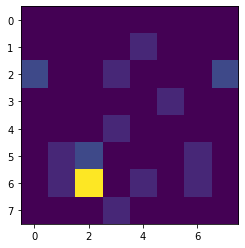

episode 3


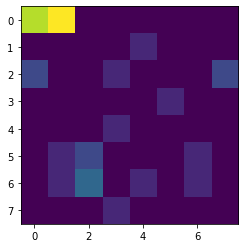

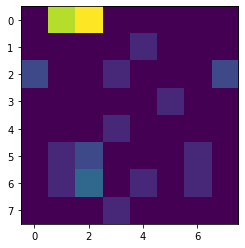

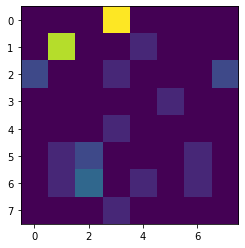

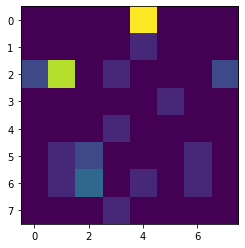

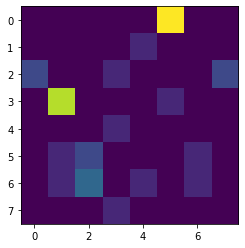

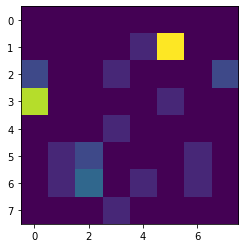

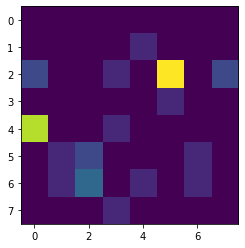

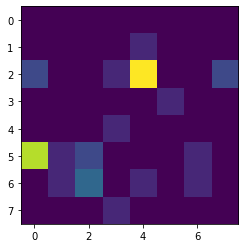

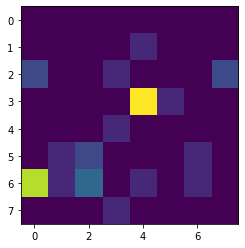

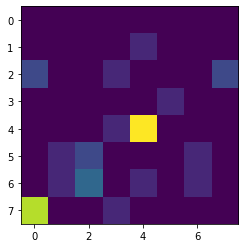

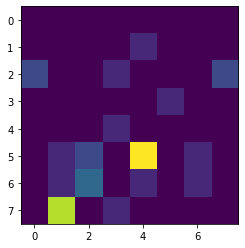

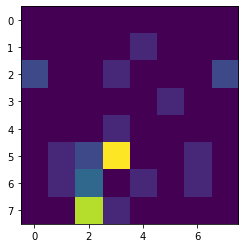

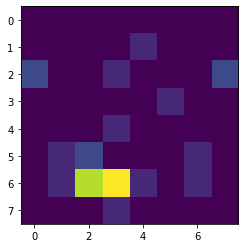

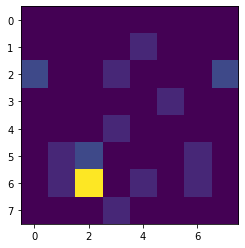

episode 4


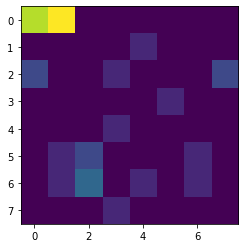

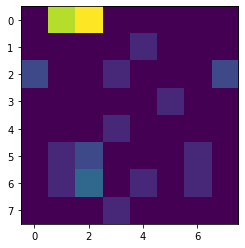

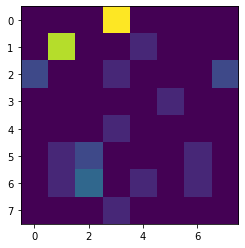

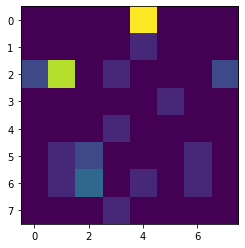

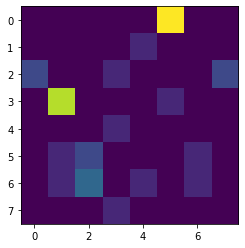

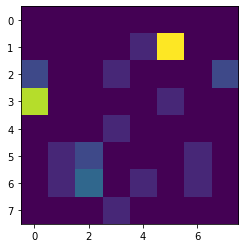

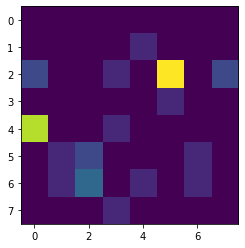

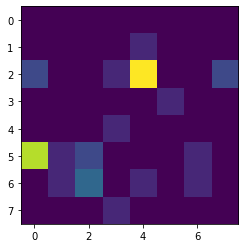

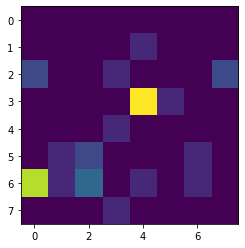

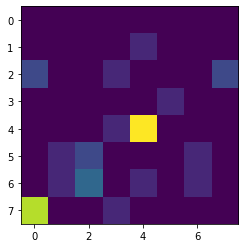

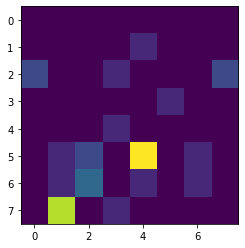

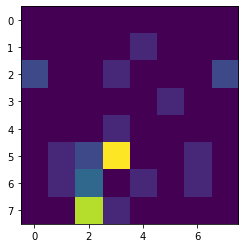

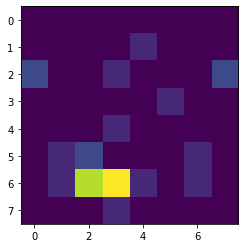

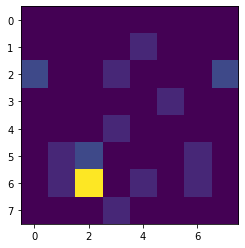

episode 5


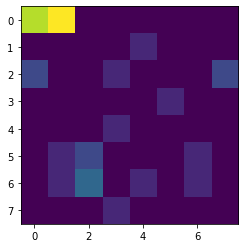

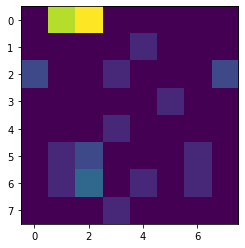

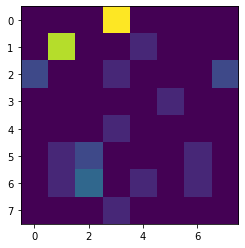

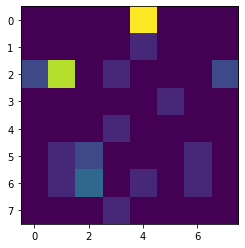

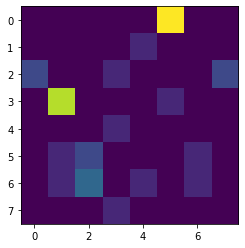

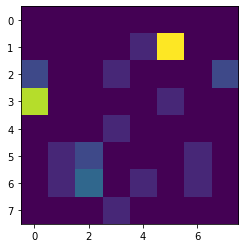

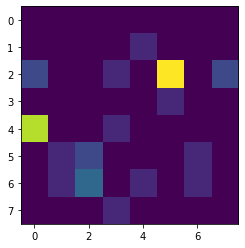

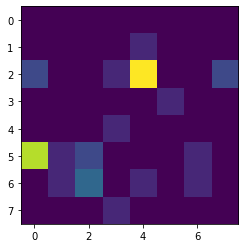

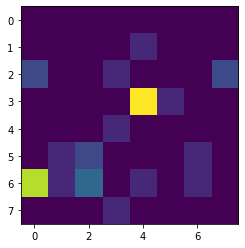

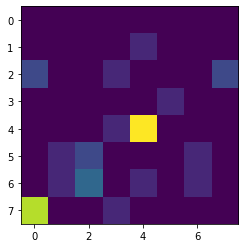

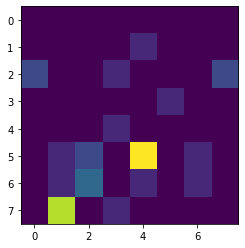

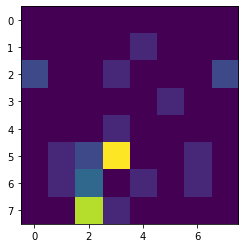

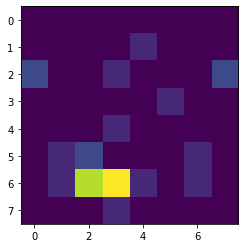

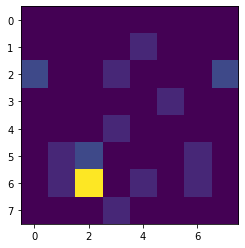

episode 6


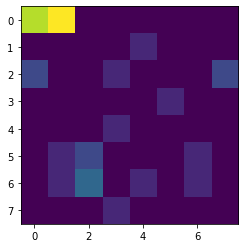

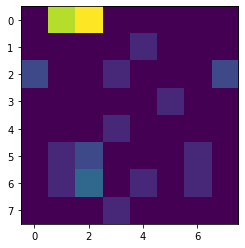

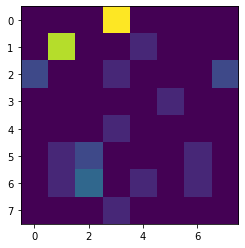

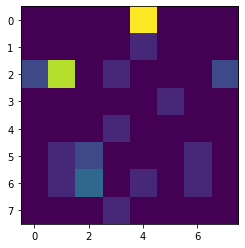

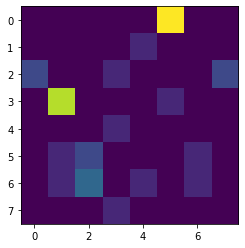

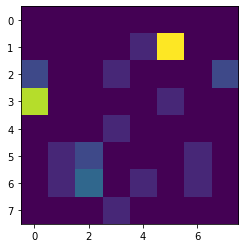

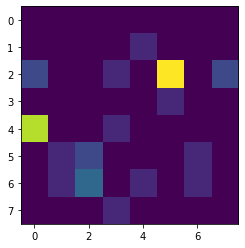

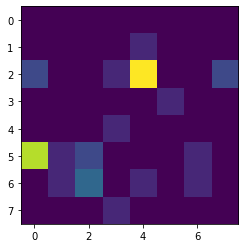

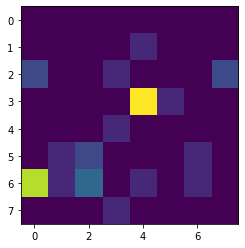

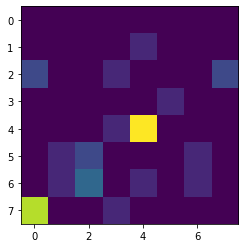

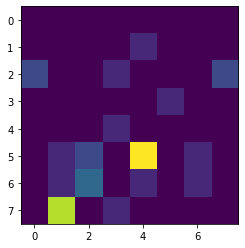

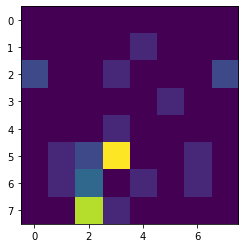

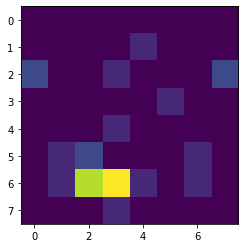

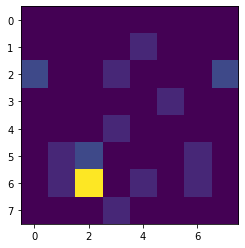

episode 7


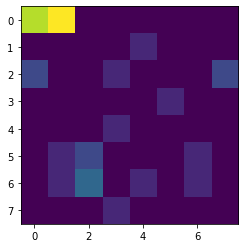

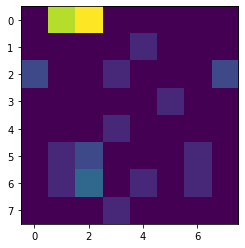

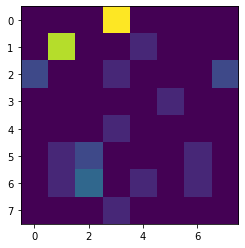

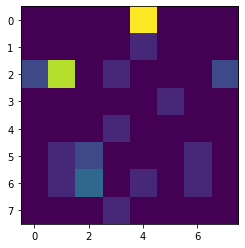

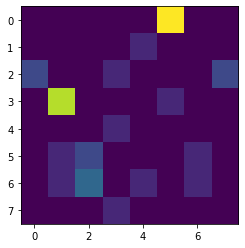

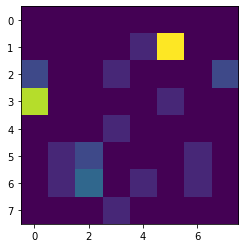

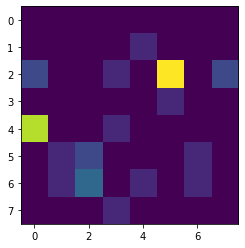

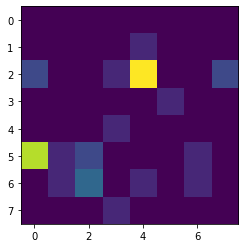

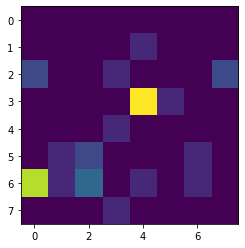

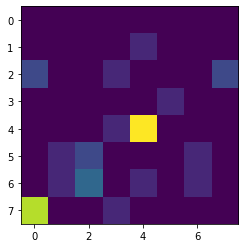

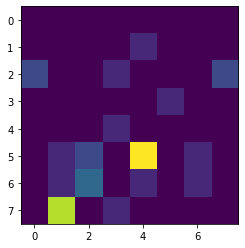

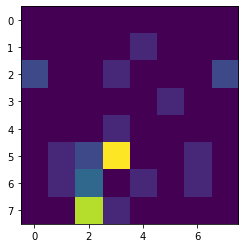

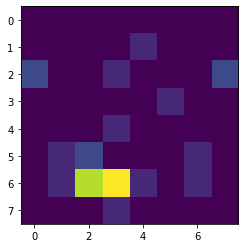

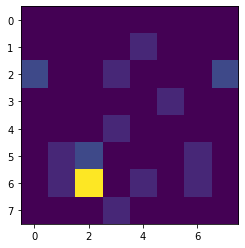

episode 8


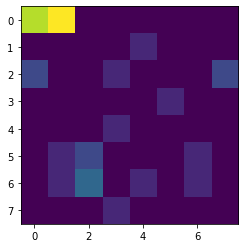

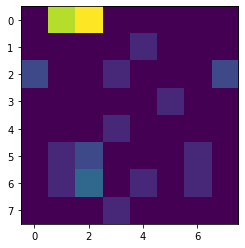

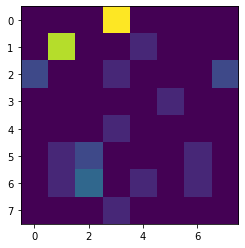

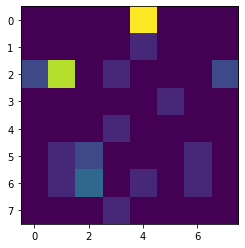

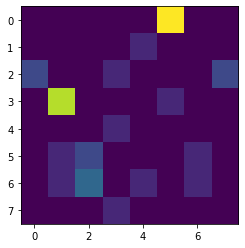

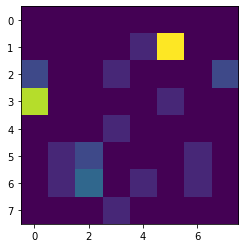

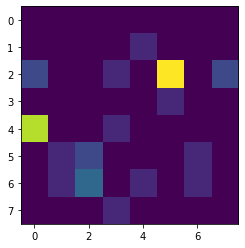

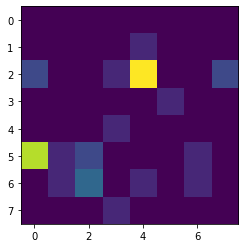

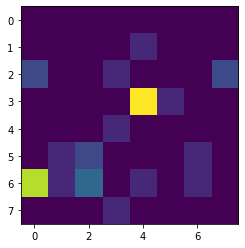

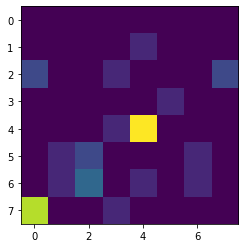

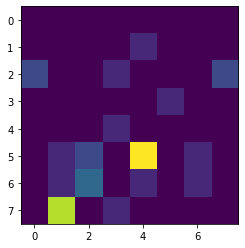

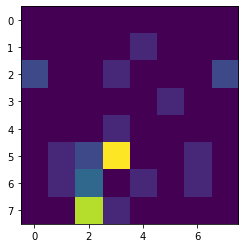

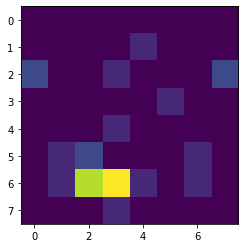

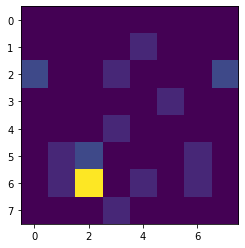

episode 9


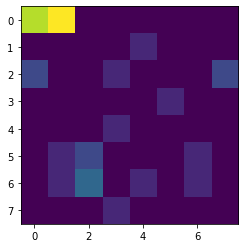

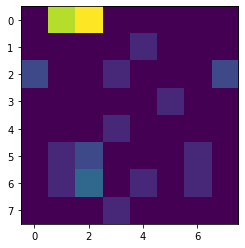

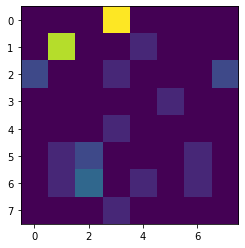

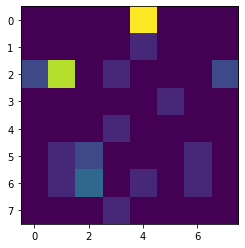

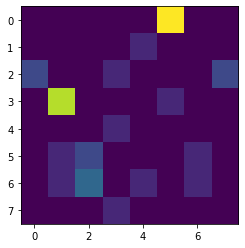

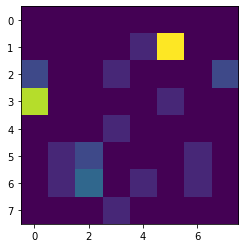

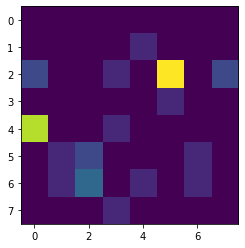

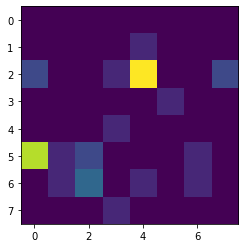

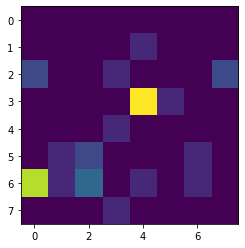

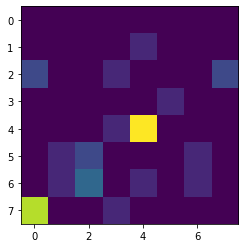

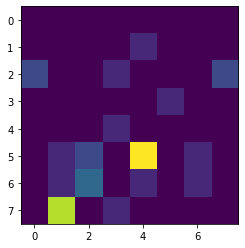

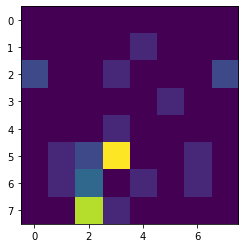

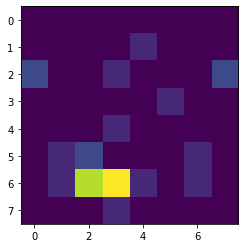

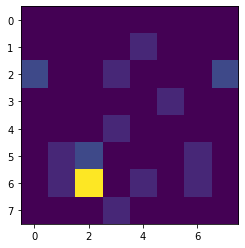

episode 10


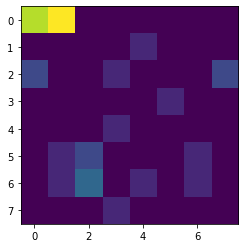

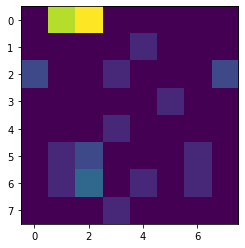

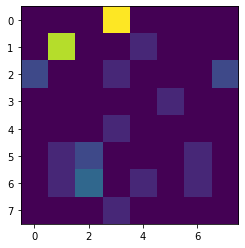

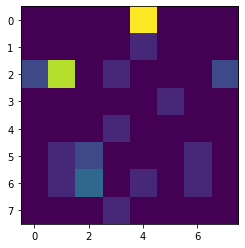

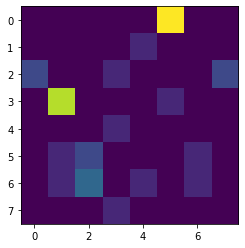

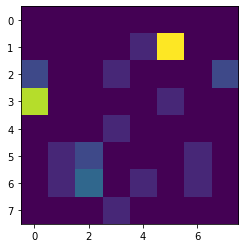

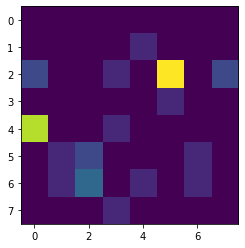

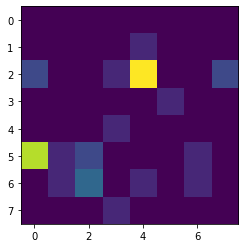

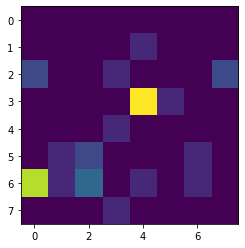

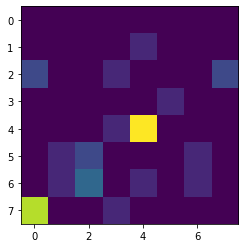

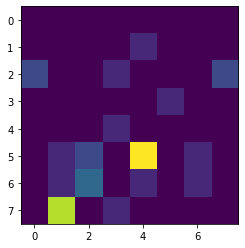

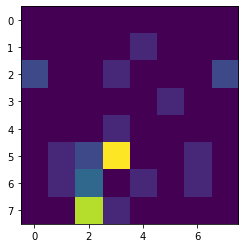

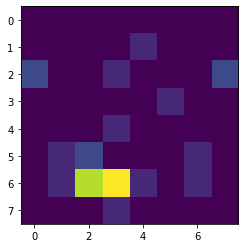

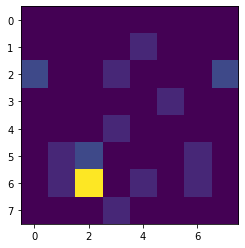

In [183]:
mapp = np.array([
    "FFFFFFFF",
    "FFFFHFFF",
    "SFFHFFFS",
    "FFFFFHFF",
    "FFFHFFFF",
    "FHSFFFHF",
    "FHGFHFHF",
    "FFFHFFFF",
])
# Create an environment with the map and two agents
env5 = Environment(mapp, 8, 2)

# Création des agents avec des positions initiales aléatoires
#agents = [Agent(np.random.randint(env.size_map**2), np.random.randint(5), 0) for _ in range(env.number_agent)]
agents = [Agent(0,0,0,False), Agent(1,0,0,False)]

# Création du jeu
game5 = Game(env5, agents)


for i in range(10):
    print(f"episode {i + 1}")
    
    terminated = False
    nbSteps = 0
    for j in range(2):
        game5.reset(game5.agents[j])
        #print( game2.agents[0].done, game2.agents[0].done)
    while (nbSteps< 20 and not terminated):
        
        state1 = game5.agents[0].state
        state2 = game5.agents[1].state
        
        # Epsilon Greedy pour l'agent 1 (exploitation uniquement)
        if not(game5.agents[0].done):
            action1 = np.argmax(Q1[state1, :])
        else:
             action1 = 4

        # Epsilon Greedy pour l'agent 2 (exploitation uniquement)
        if not(game5.agents[1].done):
            action2 = np.argmax(Q2[state2, :])
        else:
             action2 = 4

        action = [action1, action2]
        
        # Effectuer l'étape avec les actions choisies
        next_states, rewards, done = game5.step(action)
        nbSteps += 1
       
        terminated = game5.game_over()
        
        game5.display()

        